# Table of Contents:

1.- [Introduction](#Intro)  
2.- [EDA](#EDA)

[Part 1: Using all the features](#allfeat)

3.- [Logistic Regression](#logreg1)  
&nbsp; &nbsp; 3.1- [Dataset without stalk-root](#logreg1.1)  
&nbsp; &nbsp; 3.2- [Raw dataset with missing values](#logreg1.2)  
&nbsp; &nbsp; 3.3- [Raw dataset treating "?" as another class](#logreg1.3)  
&nbsp; &nbsp; 3.4- [Dataset without rows with missing values](#logreg1.4)  
&nbsp; &nbsp; 3.5- [Imputing missing values](#logreg1.5)  
&nbsp; &nbsp; 3.6- [Features Importances](#logreg1.6)  
4.- [Decision Tree and Random Forest](#dtrf)  
&nbsp; &nbsp; 4.1- [Decision Tree](#dt)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.1- [Dataset without stalk-root](#dt.1)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.2- [Raw dataset with missing values](#dt.2)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.3- [Raw dataset treating "?" as another class](#dt.3)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.4- [Dataset without rows with missing values](#dt.4)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.5- [Imputing missing values](#dt.5)    
&nbsp; &nbsp; 4.2- [Random Forest](#rf)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.1- [Dataset without stalk-root](#rf.1)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.2- [Raw dataset with missing values](#rf.2)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.3- [Raw dataset treating "?" as another class](#rf.3)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.4- [Dataset without rows with missing values](#rf.4)  
5.- [Support Vector Machine](#svm)  
6.- [K-Nearest-Neighbors](#knn)  
7.- [Naive Bayes](#NB)  
8.- [Clustering](#cluster)  
 
[Part 2: Using only the easy-to-tell features](#easyfeat)

3.- [Logistic Regression](#logreg2)  
&nbsp; &nbsp; 3.1- [Dataset without stalk-root](#logreg2.1)  
&nbsp; &nbsp; 3.2- [Raw dataset with missing values](#logreg2.2)  
&nbsp; &nbsp; 3.3- [Raw dataset treating "?" as another class](#logreg2.3)  
&nbsp; &nbsp; 3.4- [Dataset without rows with missing values](#logreg2.4)  
&nbsp; &nbsp; 3.5- [Imputing missing values](#logreg2.5)  
&nbsp; &nbsp; 3.6- [Features Importances](#logreg2.6)  
4.- [Decision Tree and Random Forest](#dtrf1)  
&nbsp; &nbsp; 4.1- [Decision Tree](#dt1)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.1- [Dataset without stalk-root](#dt1.1)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.2- [Raw dataset with missing values](#dt1.2)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.3- [Raw dataset treating "?" as another class](#dt1.3)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.4- [Dataset without rows with missing values](#dt1.4)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.5- [Imputing missing values](#dt1.5)    
&nbsp; &nbsp; 4.2- [Random Forest](#rf1)  
5.- [Support Vector Machine](#svm1)  
6.- [K-Nearest-Neighbors](#knn1)  
7.- [Naive Bayes](#NB1)  
8.- [Clustering](#cluster1)  

[Analyzing Top Features](#last) 

[Conclusions](#conclusions)

# 1. Introduction <a name="Intro"></a>

Various guides clearly state that there is no simple rule for determining the edibility of a mushroom. Normally, one needs to identify the name of the particular mushroom to be able to tell if it is edible or not. However, this task is very difficult and time-consuming for non-experts, so we thought that a machine learning approach on mushroom data could shed light on some of the features that almost guarantee a mushroom will be poisonous. This way, novices can avoid wasting time trying to identify a mushroom that will most likely end up being poisonous, and focus on mushrooms that will most likely be edible instead.

We are going to use a dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/mushroom), which contains 8123 mushrooms records about 22 features, classified as poisonous or edible, drawn from The Audubon Society Field Guide to North American Mushrooms, for two genera (Lepiota and Agaricus) from the Agaricaceae family. We hope to build various machine learning algorithms that can give perfect predictions, or at least that does not classify poisonous mushrooms as edible, and also identify the top features for better interpretability and generalization to other families of mushrooms.

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Reads the data from the UCI Machine Learning Repository as a pandas DataFrame
mushrooms = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data")
# Names the columns of the pandas DataFrame 
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
mushrooms.columns = columns

# 2. EDA <a name="EDA"></a>

In [3]:
mushrooms.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     e         x           s         y       t    a               f   
1     e         b           s         w       t    l               f   
2     p         x           y         w       t    p               f   
3     e         x           s         g       f    n               f   
4     e         x           y         y       t    a               f   

  gill-spacing gill-size gill-color   ...   stalk-surface-below-ring  \
0            c         b          k   ...                          s   
1            c         b          n   ...                          s   
2            c         n          n   ...                          s   
3            w         b          k   ...                          s   
4            c         b          n   ...                          s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 n          n       g  
1           o         p                 n          n       m  
2           o         p                 k          s       u  
3           o         e                 n          a       g  
4           o         p                 k          n       g  

[5 rows x 23 columns]

In [4]:
mushrooms.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

All the features on our dataset are categorical.

In [5]:
# Prints the number of rows for each class label
print(mushrooms["class"].value_counts())
# Computes the percentage of the edible class 
print(str(round(mushrooms["class"].value_counts()[0]/(mushrooms["class"].value_counts()[0]
                                    + mushrooms["class"].value_counts()[1])*100, 2)) +
      "% of the mushrooms are edible")

e    4208
p    3915
Name: class, dtype: int64
51.8% of the mushrooms are edible


We can see that there is a good balance between the two class labels. Before going any further, let's explore the meaning of our features. The sources for the images can be seen on the markdown text of the following cell. 

![m](http://i.imgur.com/k208z0y.jpg) ([Source](https://www.slideshare.net/rayborg/mushroom-tutorial)).

`cap-shape`: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s. 

![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-cap-shape.jpg)

`cap-surface`: fibrous=f, grooves=g, scaly=y, smooth=s.

![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-cap-surface.jpg)

`cap-color`: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y.

`bruises`: bruises=t, no=f. While identifying mushrooms, check for [bruising](https://www.mushroom-appreciation.com/identifying-mushrooms.html) by nicking the top and bottom of the cap and watching for any color change.  

`odor`: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s. 

`gill-attachment`: attached=a, descending=d, free=f, notched=n. 

![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-gill-attachment.jpg)

`gill-spacing`: close=c, crowded=w, distant=d. 

![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-gill-spacing.jpg)

`gill-color`: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y. 

`stalk-shape`: enlarging=e, tapering=t. 

![m](http://i.imgur.com/pvsTsOI.jpg)

`stalk-root`: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?. 

![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-stalk.jpg)

`stalk-surface-above-ring`: fibrous=f, scaly=y, silky=k, smooth=s.  

`stalk-surface-below-ring`: fibrous=f, scaly=y, silky=k, smooth=s.  

`stalk-color-above-ring`: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y.  

`stalk-color-below-ring`: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y.  

`veil-type`: partial=p, universal=u. Tissue that connects the stem and the cap before the gills are exposed. 

![m](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/1797-09-03_Agaricus_campestris_Plate_by_James_Sowerby.jpg/640px-1797-09-03_Agaricus_campestris_Plate_by_James_Sowerby.jpg)  

`veil-color`: brown=n, orange=o, white=w, yellow=y.

`ring-number`: none=n, one=o, two=t.

`ring-type`: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z. 

![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-ring-type.jpg)  

`spore-print-color`:  black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y. For most mushrooms, if the cap is cut off and placed gill-side-down overnight, a powdery impression reflecting the shape of the gills (or pores, or spines, etc.) is formed (when the fruit body is sporulating). The color of the powdery print, called a spore print, is used to help classify mushrooms and can help to identify them.  

`population`: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y.  

`habitat`: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d. 


As one could imagine, some of these features are easier to identify than others. More specifically, the features that can be easily classified, in our opinion, are:
* Cap Shape
* Cap Color
* Bruises
* Gill Color
* stalk-shape
* stalk-root
* stalk color
* veil color
* ring number
* ring type
* spore print color
* population
* habitat

Some that could prove harder and a bit subjective, are:
* Cap Surface
* Gill attachement
* stalk-surface
* Odor
* Gill spacement

Based on this list, we will first learn the models using all the features but later we will try to get a good enough model using only the easy features. We will also compute the feature importances using Logistic Regression and Random Forest. For now, let's continue with the EDA.

In [6]:
# Replaces "?" (UCI ML missing values are denoted by a question mark) with np.NaN across all datapoints of the dataset
dataset = mushrooms.replace('?', np.NaN)
# Gets the number of missing values on each column
dataset.isna().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

The only column with missing values is `stalk-root`. This is basically the type of root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 

![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-stalk.jpg). 

Let's focus on this potentially problematic feature.

In [7]:
# Computes the contingency table for stalk-root and the class labels
stalk_root_edibility_table = pd.crosstab(index=dataset["class"], columns=dataset["stalk-root"]) # http://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/
stalk_root_edibility_table

stalk-root     b    c    e    r
class                          
e           1920  512  864  192
p           1856   44  255    0

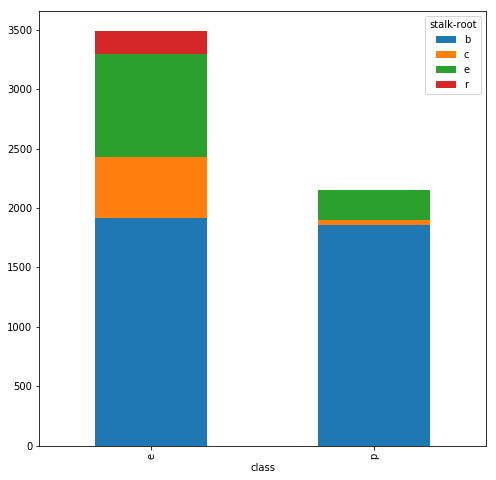

In [8]:
# Plots a stacked column chart for each class label 
stalk_root_edibility_table.plot(kind="bar", figsize=(8,8),stacked=True) # http://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/
plt.show() 

Based on this, we can see that `stalk-root` is probably not one of the most powerfult predictors. The bulbous roots have the same proportion of class labels, and while the *equal* and *club* stalks are more prevalent on the edible mushrooms, it should not make much of a difference on the machine learning process. However, we can see that all the rooted mushrooms are edible, but the sample size is not big enough (about 2.3% of the total sample size) to be relevant. We could run a $\chi^2$-test, but it would not really shed much more light on the matter. Instead, we will implement our models on slightly different datasets and compare them. 

1. Dataset without column `stalk-root`.
2. Raw dataset with `?` as `np.NaN`.
3. Raw dataset (treating `?` as possible value of `stalk-root`).
4. Dataset without rows with missing values (losing 30% of our data).

Let's get these different datasets now.

In [9]:
# Gets the dataset without the problematic feature
mushrooms_no_stalk_root = mushrooms.drop("stalk-root", axis = 1)
# Gets the raw dataset with missing values as np.NaN
mushrooms_raw_NaN = mushrooms.replace("?", np.NaN)
# Gets the dataset without the rows containing missing values
mushrooms_without_NaN = mushrooms_raw_NaN.dropna()

We can also impute the missing values by mode imputation

In [10]:
dataset["stalk-root"].value_counts()

b    3776
e    1119
c     556
r     192
Name: stalk-root, dtype: int64

In [11]:
# Imputes the missing values on the dataset
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
mushrooms_imputed = pd.DataFrame(imp.fit_transform(dataset), columns = columns)

NOTE: Uncomment and run the following cell if the above cell gives an error.

In [12]:
#mushrooms_imputed = mushrooms.replace("?", "b")

In [13]:
mushrooms_imputed["stalk-root"].value_counts()

b    6256
e    1119
c     556
r     192
Name: stalk-root, dtype: int64

but this is not such a good approach as the other values don't play any roll in the matter. A better approach would be to impute all classes on the same proportion as the non-missing data.

In [14]:
# Subsets the dataset to only get the rows with missing values
dataset_stalk_root_nan = dataset.iloc[
    dataset["stalk-root"][
    dataset["stalk-root"].isna()
].index
] 

In [15]:
dataset_stalk_root_nan["class"].value_counts()

p    1760
e     720
Name: class, dtype: int64

We can see that the rows with missing values are more of the poisonous class than of the edible... Thus, we should try to take this into account. Out of all the missing rows, 29% should follow the edible dataset's distribution, while 71% should follow the poisonous dataset's distribution, but the issue is that we don't know which ones are which, so the chance of imputting a wrong missing value is higher than with the mode, where we are at least guranteed to impute a percentage of values correctly (given they follow the same distribution). Thus, we will stick with the mode imputation approach.

# Part 1: Using all features <a name="allfeat"></a>

In this section, we will do Machine Learning using all of our features.

# 3. Logistic Regression <a name="logreg1"></a>

In this section we will implement the [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model from *sklearn*.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

As we are going to be doing basically the same process on different datasets, let's define some functions now.

In [17]:
def preprocess(data):
    
    """
    Preprocesses the input dataset and returns the training and testing data to pass on the clasiffiers
    data: dataset to be used to learn the model (DataFrame with predictor features and target)
    """
    
    # Gets the predictor features 
    X = data.drop(["class"], axis=1)
    # And encodes them (they are all categorical)
    X = pd.get_dummies(X).values
    # Gets the target feature (binary)
    y = data["class"].values
    # Encodes the target
    le = LabelEncoder()
    y = le.fit_transform(y)

    # Splits between training and testing, stratifying by the target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    
    # No need to standardize as we only have 1s and 0s for all of our variables (they are all categorical).
    # This also makes it easier to interpret the decission tree in the next section 

    return X_train, y_train, X_test, y_test

def train_and_test(model, train_data, test_data):
    
    """
    Trains the model on the training data, prints the score for such model evaluating it on the testing data
    and also returns the learned model
    model: classifier to be used
    train_data: [X_train, y_train]
    test_data: [X_test, y_test]
    """
    
    # Fits the model to the training data 
    model.fit(train_data[0], train_data[1])
    # Evaluates the model using the testing data
    print(model.score(test_data[0], test_data[1]))
    # Returns the fitted model
    return model

## 3.1. Dataset without stalk-root <a name="logreg1.1"></a>

In [18]:
# Preprocesses the dataset
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)

In [19]:
# Trains and computes the accuracy of the sklearn default logistic regression on the testing data
# and also gets the learned model
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


In [20]:
# Checking that we also get a perfect score on the training data
logreg.score(X_train, y_train)

1.0

The logistic regression classifier works perfectly. This is no surprise, as we have a lot of data and features, even when we do not use the feature `stalk-root`. 

## 3.2 Raw dataset with missing values <a name="logreg1.2"></a>

In [21]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_raw_NaN)
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


## 3.3 Raw dataset treating "?" as another class <a name="logreg1.3"></a>

In [22]:
X_train, y_train, X_test, y_test = preprocess(mushrooms)
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


## 3.4 Dataset without rows with missing values <a name="logreg1.4"></a>

In [23]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test]) 

1.0


## 3.5 Imputing missing values <a name="logreg1.5"></a>

In [24]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_imputed)
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


## 3.6 Features Importances <a name="logreg1.6"></a>

One intereseting thing we can do with Logistic Regression is computing the feature importances ranking by a backward propagation method. In particular, we are going to implement [Recursive Feature Implementation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) from *sklearn*, which ranks the importance of each feature by considering smaller and smaller subsets of them, through the `coef_` attribute, which is the weight of each feature on the model. 

We are going to use the model learned on section 3.4, as we have all the features and no missing values.

In [25]:
from sklearn.feature_selection import RFE
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)

In [26]:
logreg = LogisticRegression(random_state = 0)
# Gets the ranking selection object
selector = RFE(logreg)  
# Fits it to the training data
selector.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

In [27]:
# Gets the ranking of importance for each dummy variable
rankings = {} 
cols = pd.get_dummies(mushrooms_without_NaN.drop("class", axis = 1)).columns
for i in range(len(selector.support_)):
    rankings[cols[i]] = selector.ranking_[i]

`rankings` is a dictionary containing the ranking of each dummy feature, but what we are interested in is the ranking of the original features. To this end, we are going to compute the mean of the rankings for every dummy feature of each original feature. This method, however, is clearly not the best. Furthermore, the own rankings are based on the weights of each feature, which is not really such a good meassure of importance. We will get better feature importances when we implement the random forest.

In [28]:
ranking_original = {}
# For each original feature (minus target)
for j in columns[1:]:
    # Creates empty list
    ranks = []
    # For each dummy feature
    for i in rankings.keys():
        # If the name (string) of the original feature is in the name (string) of the dummy feature
        if j in i:
            # Appends the ranking of such dummy feature to the list
            ranks.append(rankings[i])
    # Computes the mean of the rankings of the dummy features corresponding to the original feature
    ranking_original[j] = np.mean(ranks) 

In [29]:
# Sorts the rankings in ascending order
sorted(ranking_original, key=ranking_original.get) # https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

['odor',
 'gill-size',
 'stalk-shape',
 'ring-number',
 'spore-print-color',
 'veil-color',
 'stalk-root',
 'stalk-surface-above-ring',
 'ring-type',
 'cap-color',
 'cap-surface',
 'gill-spacing',
 'stalk-color-below-ring',
 'veil-type',
 'population',
 'stalk-color-above-ring',
 'habitat',
 'gill-color',
 'stalk-surface-below-ring',
 'cap-shape',
 'gill-attachment',
 'bruises']

We can see that `stalk-root` is in a higher place than expected. However, this ranking of feature importance is not really very reliable. We can also see that out of our list of harder features to classify, only `odor` has a very important role, which is good news.

# 4. Decision Tree and Random Forest <a name="dtrf"></a>

Here we will implement Decision Tree and Random Forest Classifiers from *sklearn*. They don't support [categorical variables](https://stats.stackexchange.com/questions/152433/will-decision-trees-perform-splitting-of-nodes-by-converting-categorical-values) without [one-hot encoding](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/) so we will have to one-hot encode them and thus create lots of new columns.

# 4.1 Decision Tree <a name="dt"></a>

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

Let's define the plotting function for the decision tree.

In [31]:
def tree_plot(tree, data):
    """
    Returns the graph to plot the decision tree
    tree: decision tree to be plotted
    data: dataset used to learn the tree
    """
    dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['e', # e comes firts because it is assigned a 0 by the LabelEncoder
                                        'p'],
                           feature_names=pd.get_dummies(data.drop(["class"], axis=1)).columns,
                           out_file=None) 

    return graph_from_dot_data(dot_data) 

## 4.1.1 Dataset without stalk-root <a name="dt.1"></a>

In [32]:
# Preprocesses the dataset
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)

In [33]:
# Trains and computes the accuracy of the sklearn default decision tree on the testing data
# and also gets the learned tree
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


In this case we also get a perfect score, which is actually to be expected as we have so much data and the nature of the decision tree is very well suited for this problem.

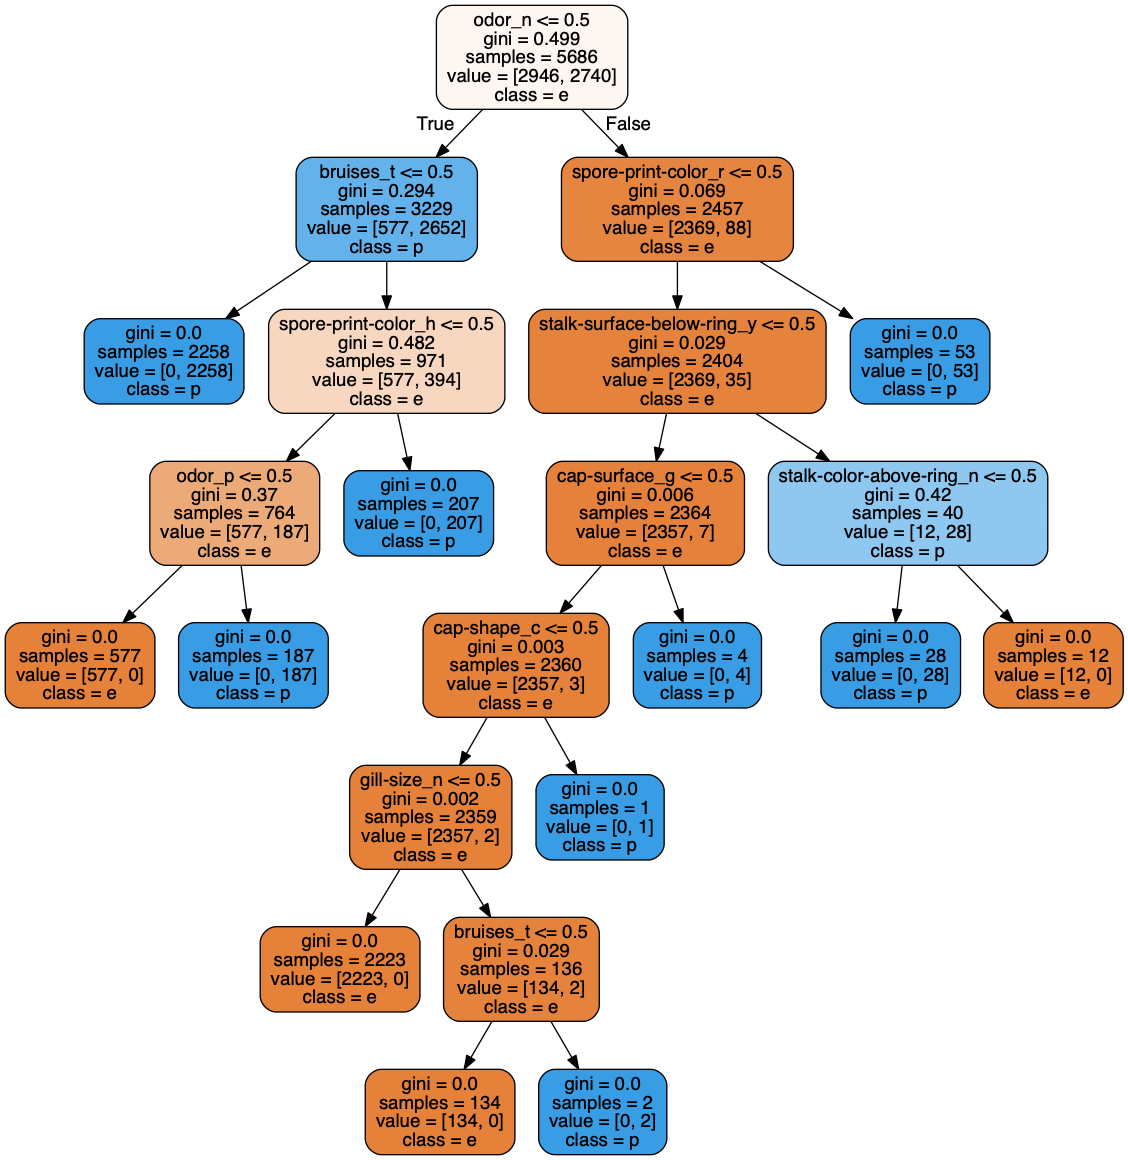

In [34]:
# Plots the tree we just learned
graph = tree_plot(tree, mushrooms_no_stalk_root)
Image(graph.create_png()) 

The nodes structure is as follows: `feature_value` $\leq$ 0.5 means that the mushrooms do not have such value of such feature. Thus, the left branch leads to the part of the dataset with `feature` $\neq$ `value` ([`False and True`] $=$ `False`) , and the right branch leads to `feature` $=$ `value`. `gini` measures the gini impurity at the node. `samples` gives the total number of rows at the node, and `values` tell the number of samples with class [edible, poisonous], while `class` says the most frequent class and the color is indicative of the percentage pressence of each class.

Here we can already draw some interesting conclusions, such as that a mushroom with some odor (`odor_n` means no odor) and that doesn't bruise is automatically posionous. However, let's remember that this is only true for the two genera our data comes from. Let's make sure of this fact 

In [35]:
# Subsets the dataset following the rules learned by the tree and gives the unique labels
mushrooms[mushrooms["odor"] != "n"][mushrooms["bruises"] != "t"]["class"].value_counts()

p    3252
Name: class, dtype: int64

Notice that we are getting more datapoints than 2258 (`samples` in the leaf node) because the plotted tree is the one learned on the training data. To get the whole tree and see that it will be the same, let's repeat the process but on the whole data.

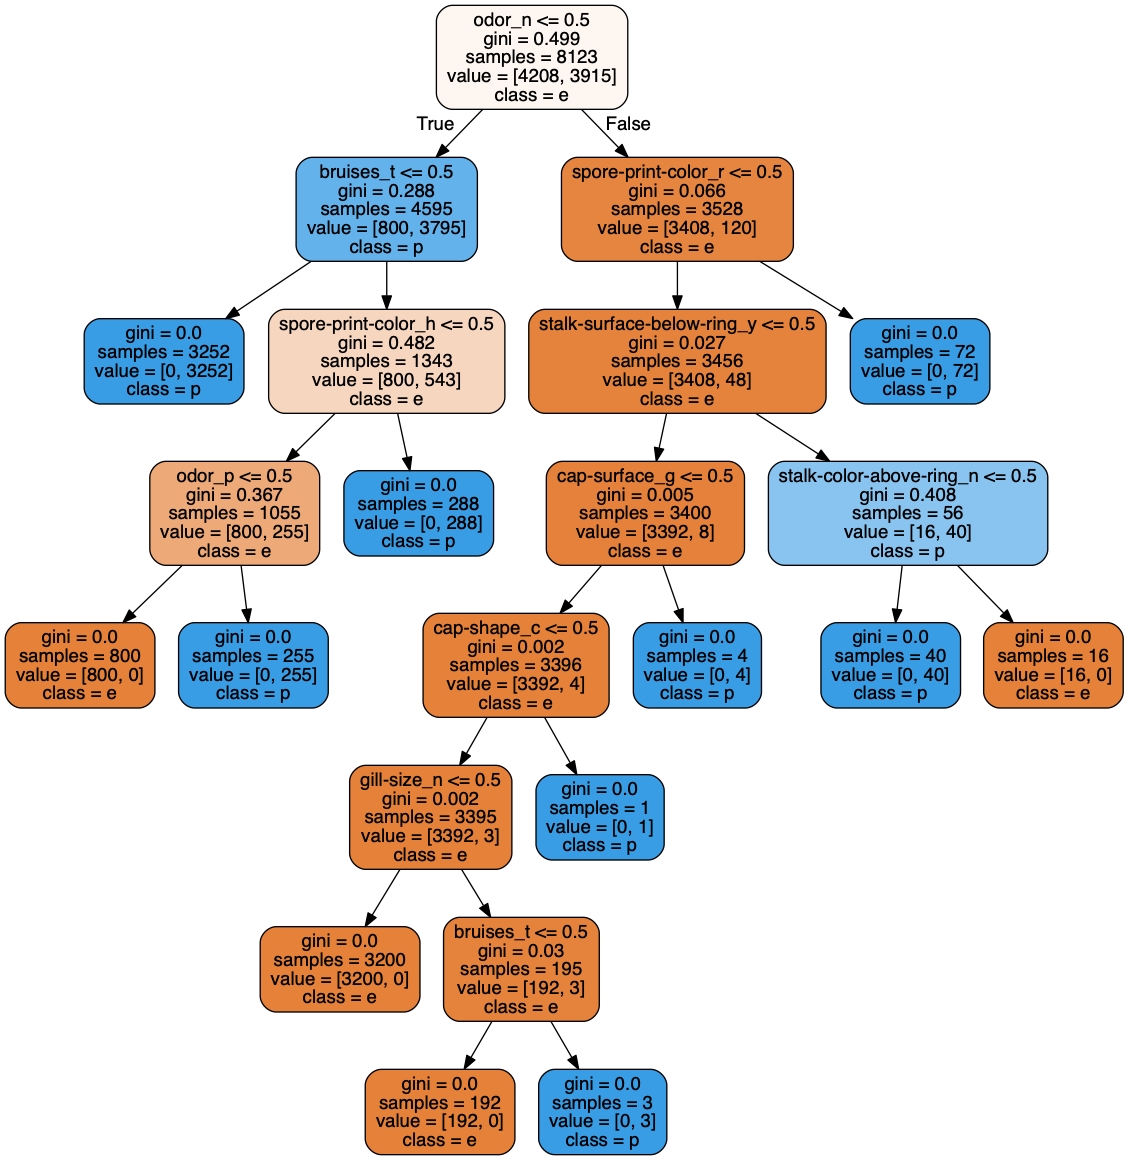

In [36]:
X = mushrooms_no_stalk_root.drop(["class"], axis=1)
X = pd.get_dummies(X).values
y = mushrooms_no_stalk_root["class"].values
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X, y)
graph = tree_plot(tree, mushrooms_no_stalk_root)
Image(graph.create_png()) 

In [37]:
# Prints the number of tree nodes (https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html)
tree.tree_.node_count

23

## 4.1.2 Raw dataset with missing values <a name="dt.2"></a>

In [38]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_raw_NaN)
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


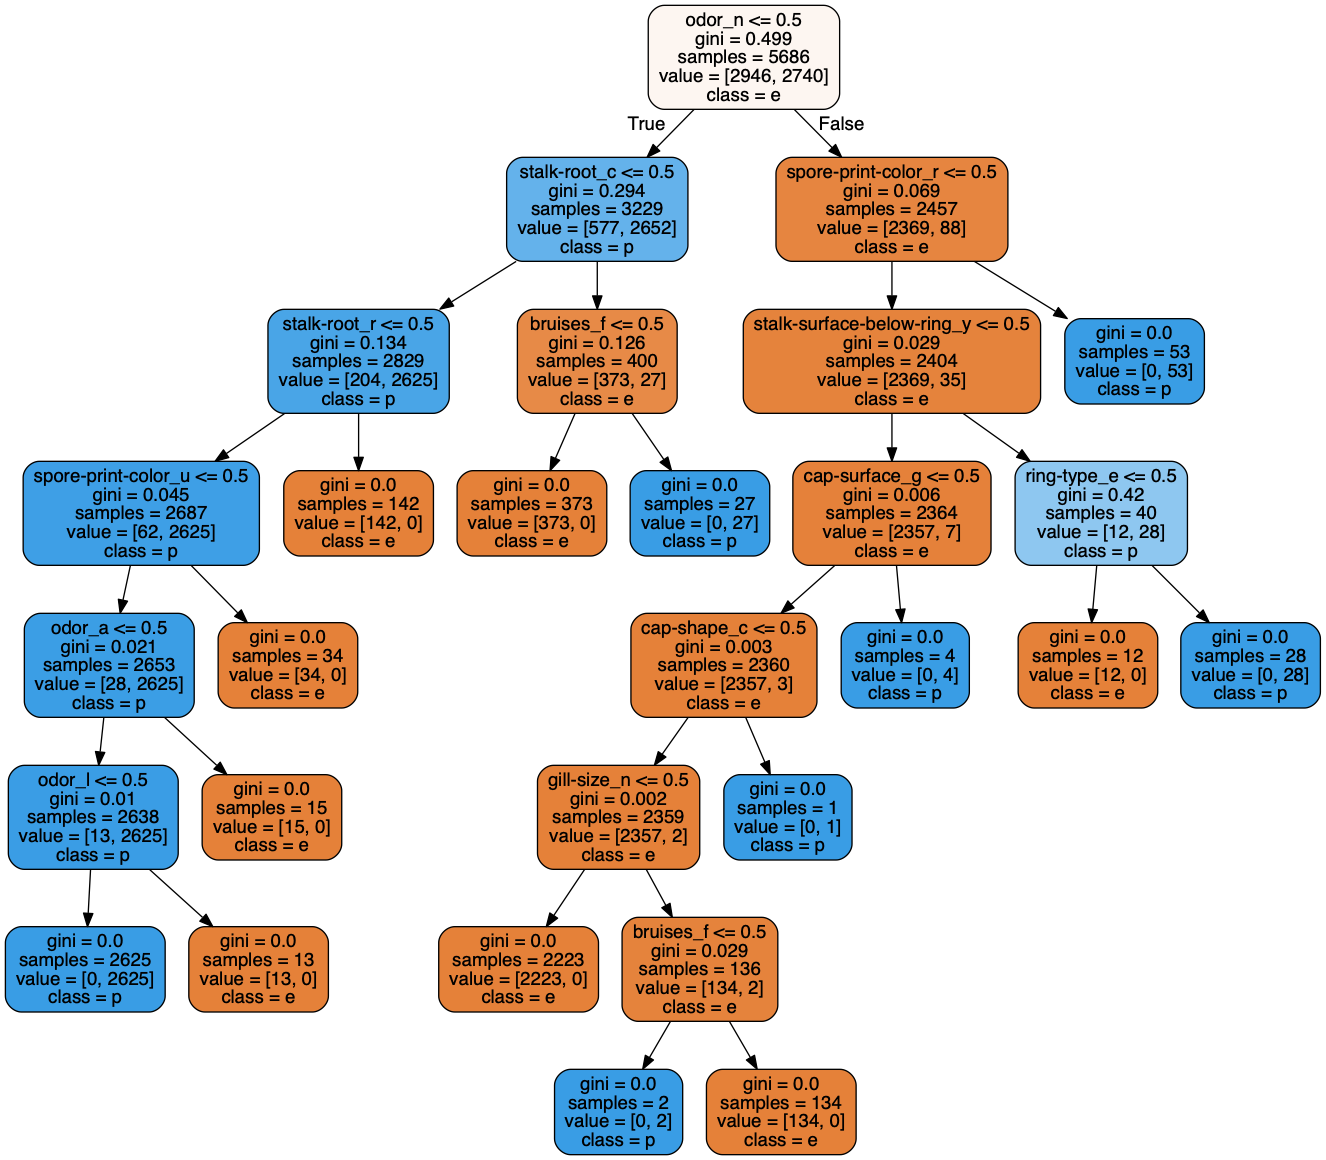

In [39]:
graph = tree_plot(tree, mushrooms_raw_NaN) 
Image(graph.create_png())

In [40]:
# Prints the number of tree nodes (https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html)
tree.tree_.node_count

29

The tree changes but the score is the same. It seems that training with or without `stalk-root` gives the same accuracy, but actually `stalk-root` is almost at the top of the tree on some leaves, which is an indication that although `stalk-root` is a significant predictor, a combination of the some of the rest of the predictors can do the same job. We can also see that the tree is a little bit more complex in this last case.

## 4.1.3 Raw dataset treating "?" as another class <a name="dt.3"></a>

In [41]:
X_train, y_train, X_test, y_test = preprocess(mushrooms)
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


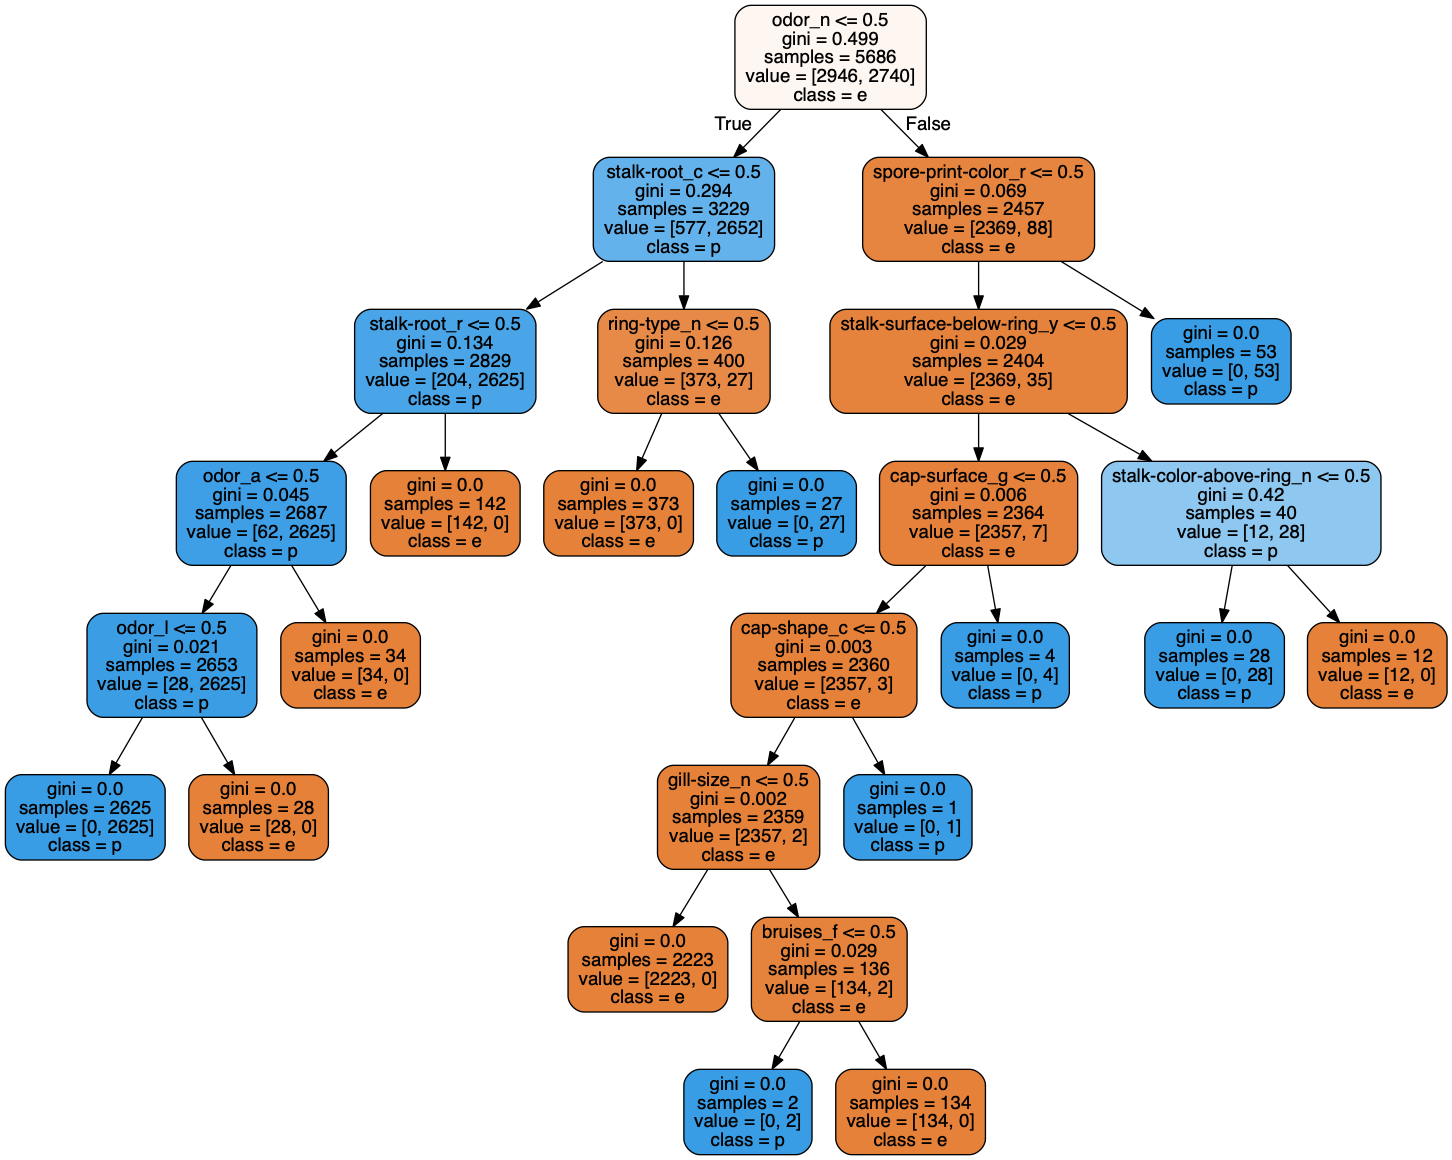

In [42]:
graph = tree_plot(tree, mushrooms) 
Image(graph.create_png())

In [43]:
# Prints the number of tree nodes (https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html)
tree.tree_.node_count

27

Same score, the tree does change a little bit but not so much.

## 4.1.4 Dataset without rows with missing values <a name="dt.4"></a>

In [44]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


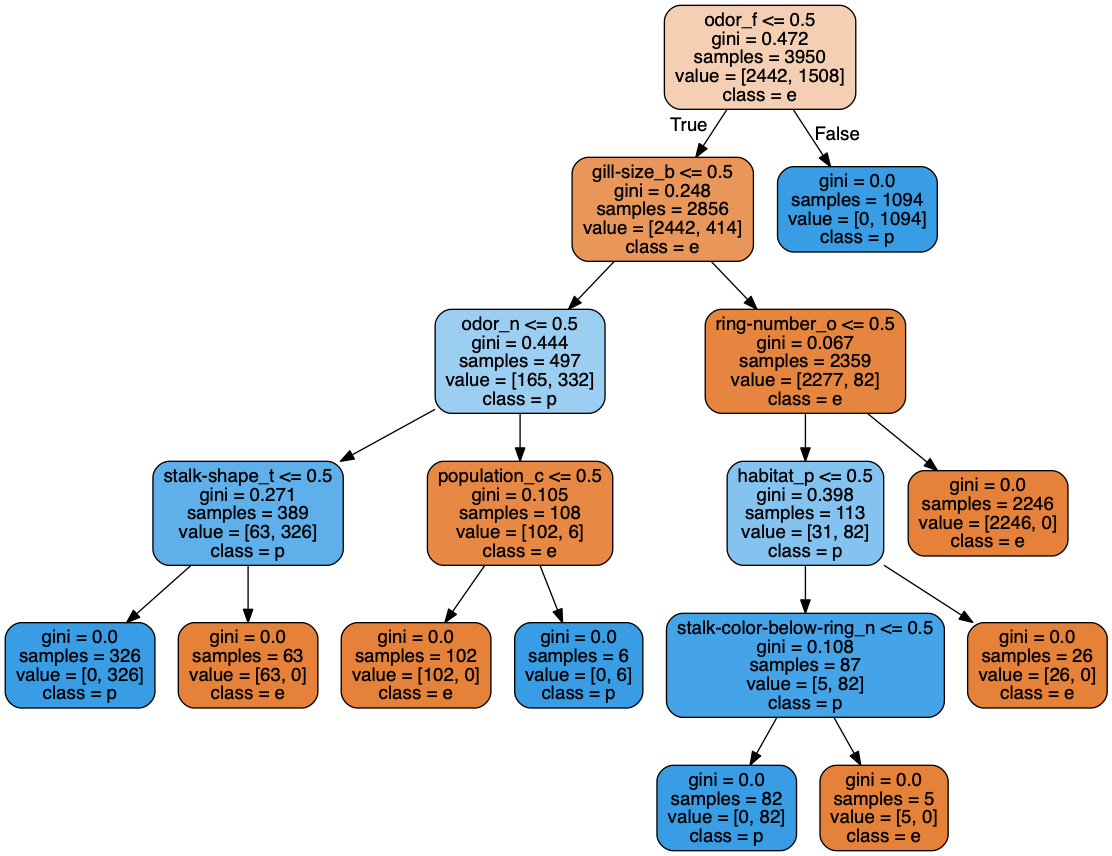

In [45]:
graph = tree_plot(tree, mushrooms_without_NaN) 
Image(graph.create_png())

In [46]:
# Prints the number of tree nodes (https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html)
tree.tree_.node_count

17

This approach gives the simplest tree. Let's check some of the rules learned by this tree.

In [47]:
mushrooms[mushrooms["odor"] == "f"]["class"].value_counts()

p    2160
Name: class, dtype: int64

In [48]:
mushrooms[mushrooms["odor"] != "f"][mushrooms["gill-size"] == "b"][mushrooms["ring-number"] == "o"]["class"].value_counts()

e    3392
Name: class, dtype: int64

We could keep going but we are more interested in analyzing the tree that does not rely on the *hard-to-tell* features.

## 4.1.5 Imputing missing values <a name="dt.5"></a>

In [49]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_imputed)
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


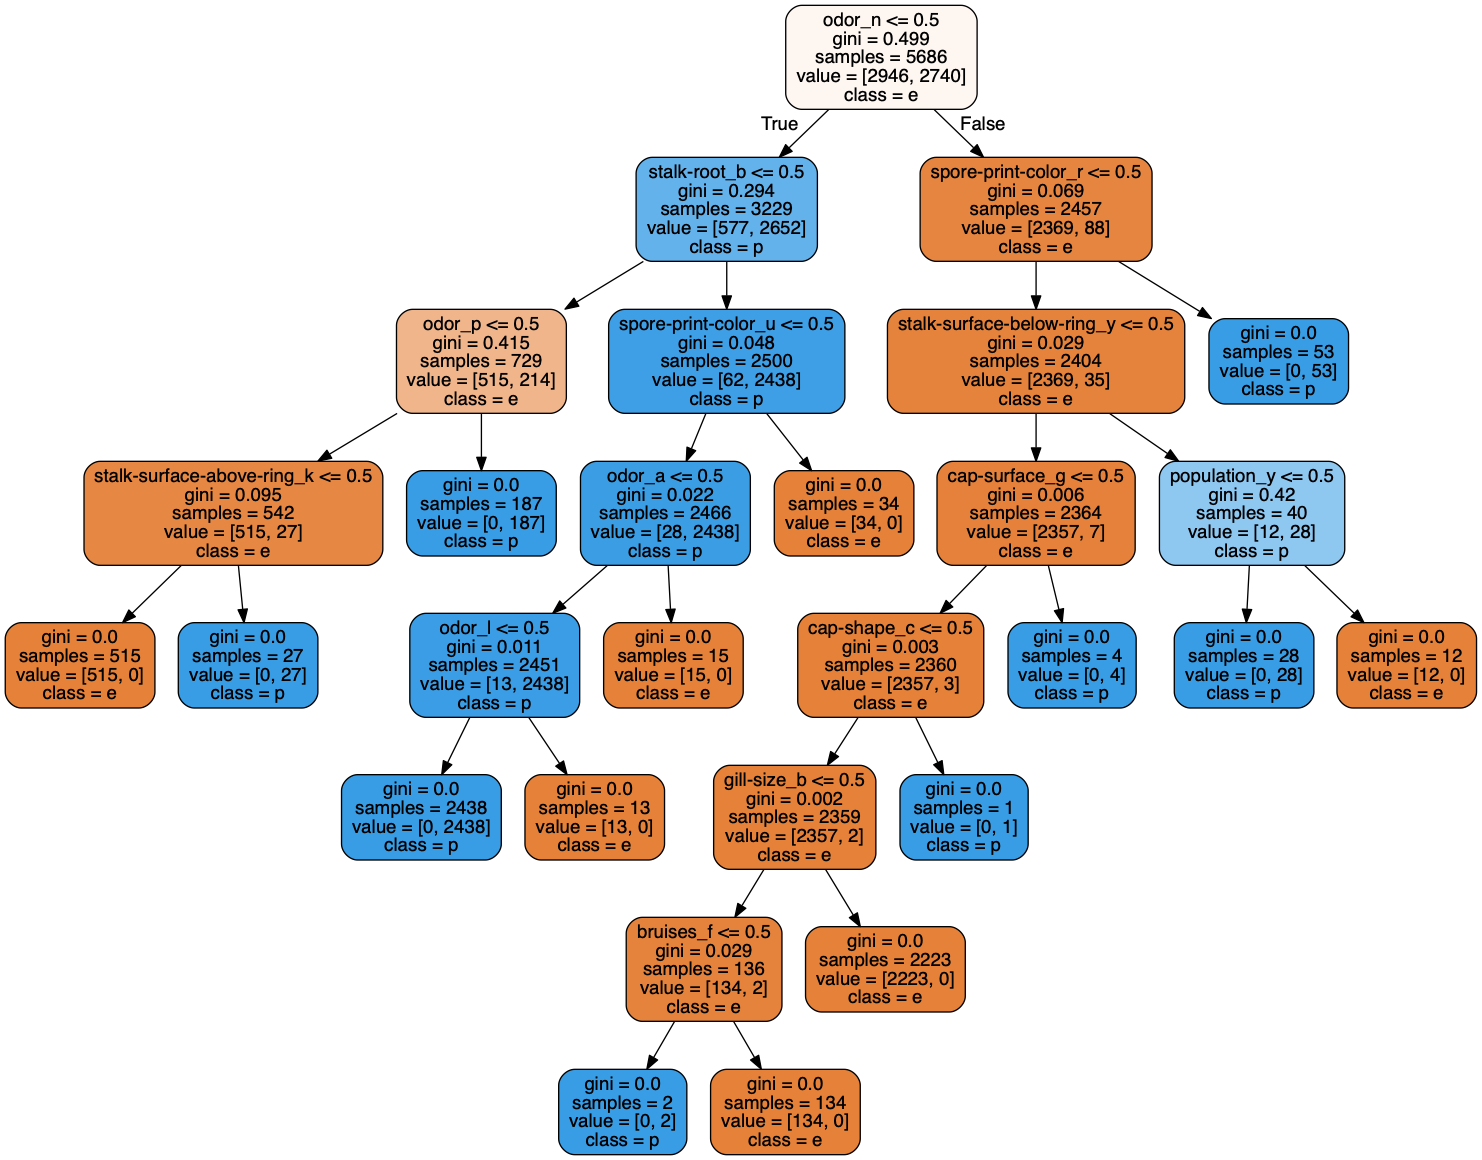

In [50]:
graph = tree_plot(tree, mushrooms_imputed)  
Image(graph.create_png())

In [51]:
# Prints the number of tree nodes (https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html)
tree.tree_.node_count

29

By imputing the missing values and using all data with all features, we again get the most complex tree, which makes sense.

# 4.2 Random Forest <a name="rf"></a>

In [52]:
from sklearn.ensemble import RandomForestClassifier

## 4.2.1 Dataset without stalk-root <a name="rf.1"></a>

In [53]:
# Preprocesses the dataset
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)

In [54]:
# Trains and computes the accuracy of the sklearn default decision tree on the testing data
# and also gets the learned tree
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


## 4.2.2 Raw dataset with missing values <a name="rf.2"></a>

In [55]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_raw_NaN)
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


Now let's get the features importances. This case will be more reliable to get the importances of the original features because random forest actually gives back a numerical importance for each dummy feature, and the way it computes this importance is also better than Logistic Regression (it basically averages the total decrease in node impurity at the node corresponding to the feature, weighted by the probability of reaching such node, over all of the trees in the forest).

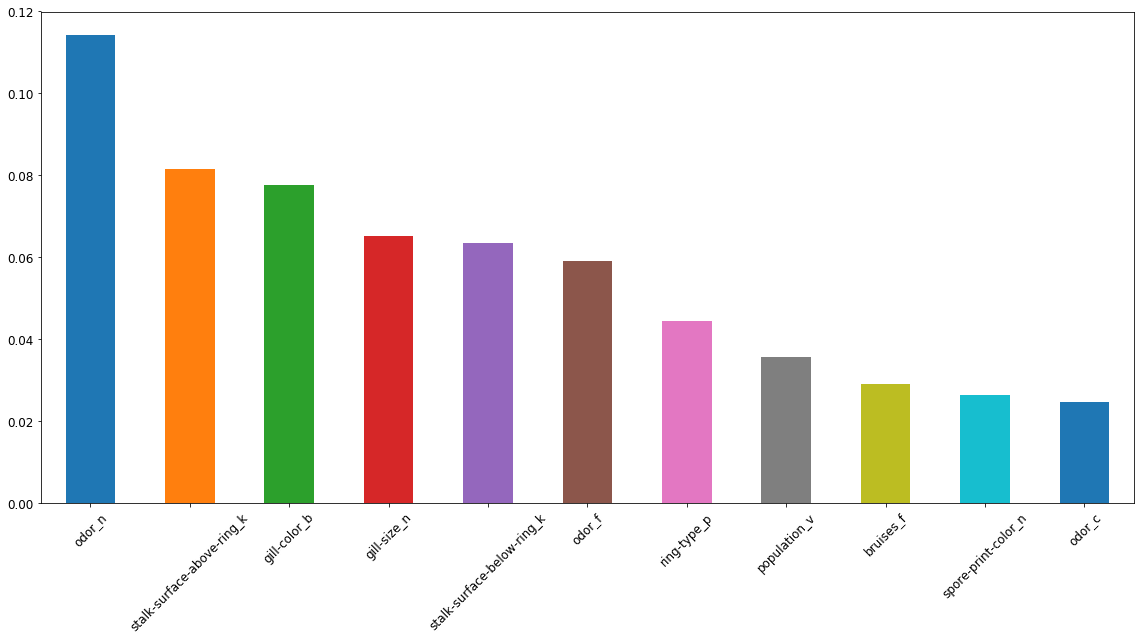

In [56]:
# Gets the importance of each dummy feature
importances = forest.feature_importances_
# Converts the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, pd.get_dummies(mushrooms_raw_NaN.drop(["class"], axis=1)).columns)
# Sorts the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)
# Get the top 10 most important features
f_importances_top_10 = f_importances.iloc[0:11]
# Draws the bar Plot for the 10 most important features 
f_importances_top_10.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=12)
# Shows the plot
plt.tight_layout()
plt.show()

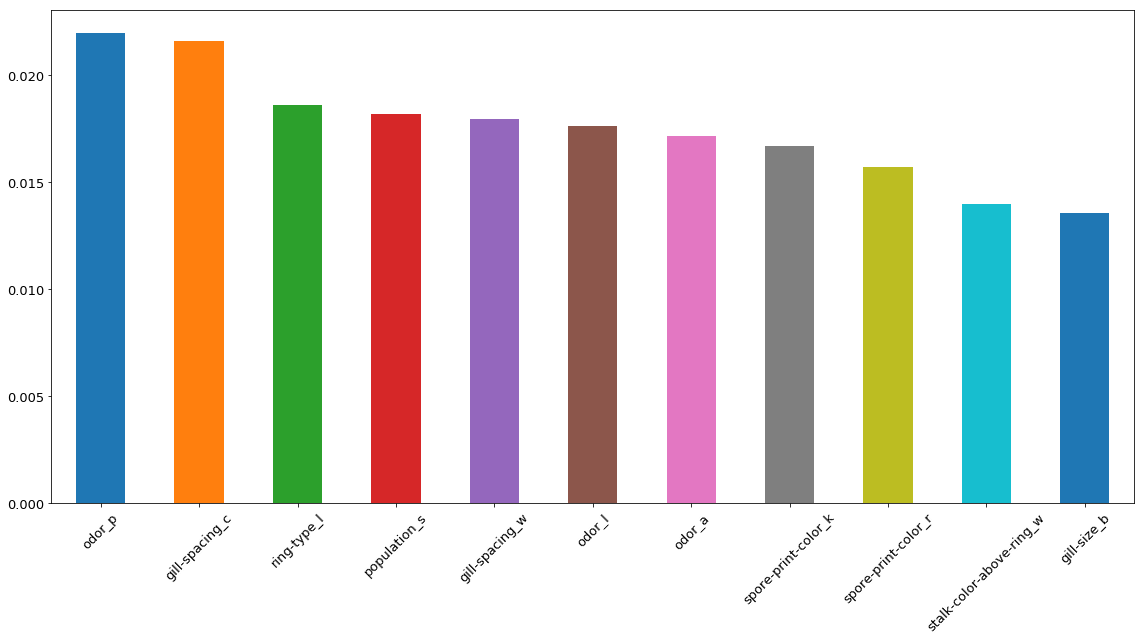

In [57]:
f_importances_top_20 = f_importances.iloc[11:22] 
f_importances_top_20.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=13)
plt.tight_layout()
plt.show()

Let's compute the original features importance by adding up the importances of each of its corresponding dummy variables.

In [58]:
# Names of the dummy variables
features = pd.get_dummies(mushrooms_raw_NaN.drop(["class"], axis=1)).columns
# Computes this again because we do not want it sorted
f_importances = pd.Series(importances, features) 
importa_dict = {}
# For each feature in the original dataframe
for i in mushrooms_raw_NaN.drop("class", axis = 1).columns:
    # Assigns this feature as key and the sum of the importances of every dummy variable corresponding to it as value
    importa_dict[i] = f_importances[features.str.contains(i)].sum() # Subsets f_importances with the columns containing the name 
    # "i", which is the original feature name, so it gets all the dummy columns "i_..."
feat_importances = pd.Series(importa_dict).sort_values(ascending=False)

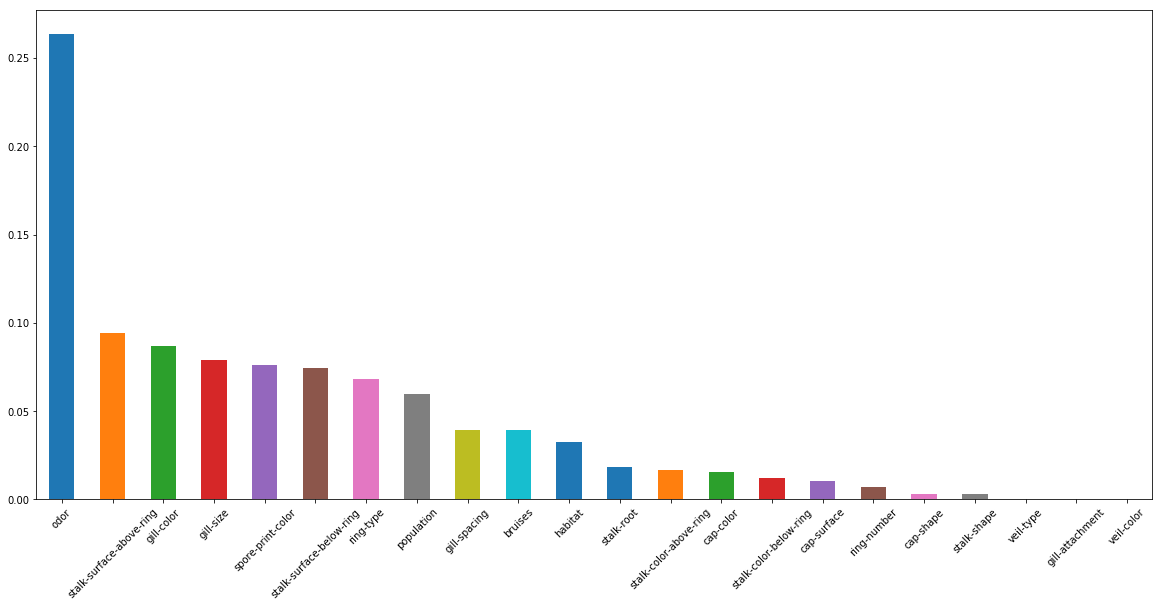

In [59]:
feat_importances.plot(kind='bar', figsize=(20,9), rot=45, fontsize=10)
plt.show()

As we already saw with the decision trees, `odor` seems to be the most relevant feature for prediction, with its importance being actually more than double the second most important feature. Comparing with our list of hard features to classify, we see that `odor` is the most relevant one, and that `stalk-surface-above-ring` is also the second most relevant feature, while `stalk-surface-below-ring` is the 6th most relevant, and `gill-spacing` is 9th. We can also see that `stalk-root` is not that relevant. We will learn models without the hard features later, but we can already imagine that our accuracy will probably be affected. 

For now, let's see how many features we really need to get a perfect score.

In [60]:
def rf_score(n_features):
    
    """"
    Returns the score of the random forest using the n_features most important features
    """
    
    # Slices the list of names of features sorted by importance from the most important until n_features
    X = mushrooms_raw_NaN[list(feat_importances.index)[0:n_features]]
    X = pd.get_dummies(X).values
    y = mushrooms_raw_NaN["class"].values
    le = LabelEncoder()
    y = le.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    forest = RandomForestClassifier(random_state = 0)
    forest.fit(X_train, y_train)
    return forest.score(X_test, y_test)

In [61]:
for i in range(1, len(feat_importances.index)):
    if rf_score(i) == 1:
        print(i)
        break

7


So we only need 7 features out of the original 23 to get 100% accuracy! This should make it easier for people to identify the poisonous mushrooms! So if they have a computer or even a phone, they can run this Random Forest on a row of data where they fill the value of every feature and it would give them an answer in order to eat the mushrooms or not. 
However, we also wanted to just tell them a way to categorize the poisonous mushrooms without using any machine... this can easily be done with decision trees!

Remember that this is only if the can identify the genus of the mushroom as one of the two we are working with.

In [62]:
list(feat_importances.index)[0:7]

['odor',
 'stalk-surface-above-ring',
 'gill-color',
 'gill-size',
 'spore-print-color',
 'stalk-surface-below-ring',
 'ring-type']

In [63]:
subset = list(feat_importances.index)[0:7]
subset.append("class")
X_train, y_train, X_test, y_test = preprocess(mushrooms_raw_NaN[subset])
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


## 4.1.3 Raw dataset treating "?" as another class <a name="rf.3"></a>

In [64]:
X_train, y_train, X_test, y_test = preprocess(mushrooms)
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


## 4.1.4 Dataset without rows with missing values <a name="rf.4"></a>

In [65]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


Let's also get the features importances for this case.

In [66]:
# Gets the importance of each features
importances = forest.feature_importances_
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, pd.get_dummies(mushrooms_without_NaN.drop(["class"], axis=1)).columns)
# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)
# Get the top 10 most important features
f_importances_top_10 = f_importances.iloc[0:11]
# Draws the bar Plot for the 10 most important features 
f_importances_top_10.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=13)
# Show the plot
plt.tight_layout()
plt.show()

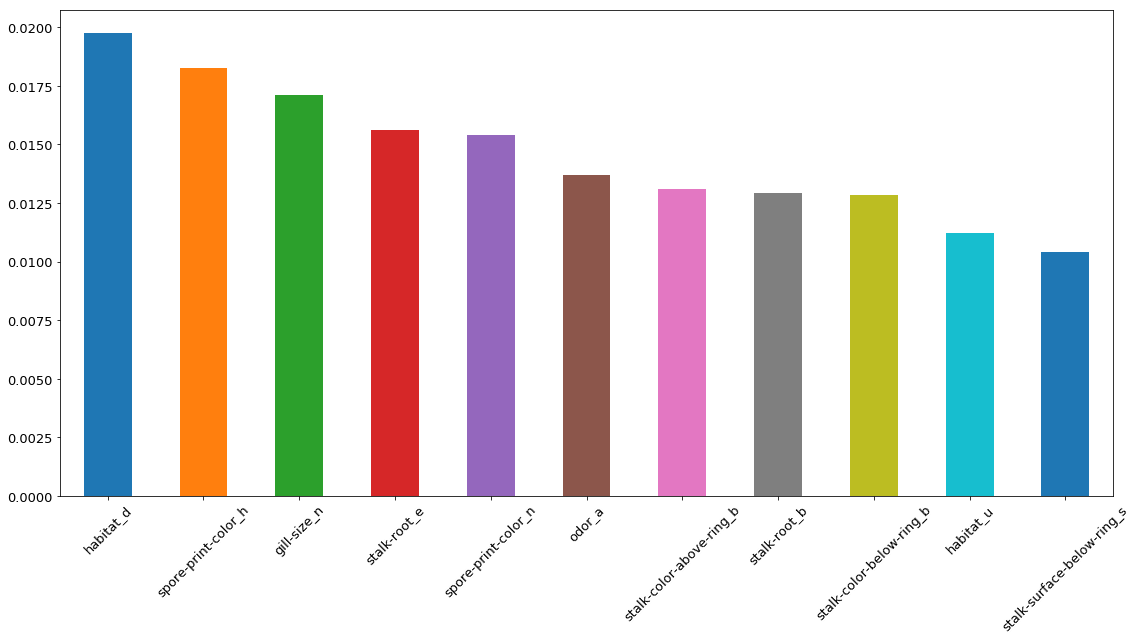

In [67]:
f_importances_top_20 = f_importances.iloc[11:22] 
f_importances_top_20.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=13)
plt.tight_layout()
plt.show()

In [68]:
# Names of the dummy variables
features = pd.get_dummies(mushrooms_without_NaN.drop(["class"], axis=1)).columns
# Computes this again because we don't wont it sorted
f_importances = pd.Series(importances, features) 
importa_dict = {}
# For each feature in the original dataframe
for i in mushrooms_without_NaN.drop("class", axis = 1).columns:
    # Assign this feature as key and the sum of the importances of every dummy variable corresponding to it as value
    importa_dict[i] = f_importances[features.str.contains(i)].sum() # Subsets f_importances with the columns containing the name 
    # "i", which is the original feature name, so it gets all the dummy columns "i_..."
feat_importances = pd.Series(importa_dict).sort_values(ascending=False)

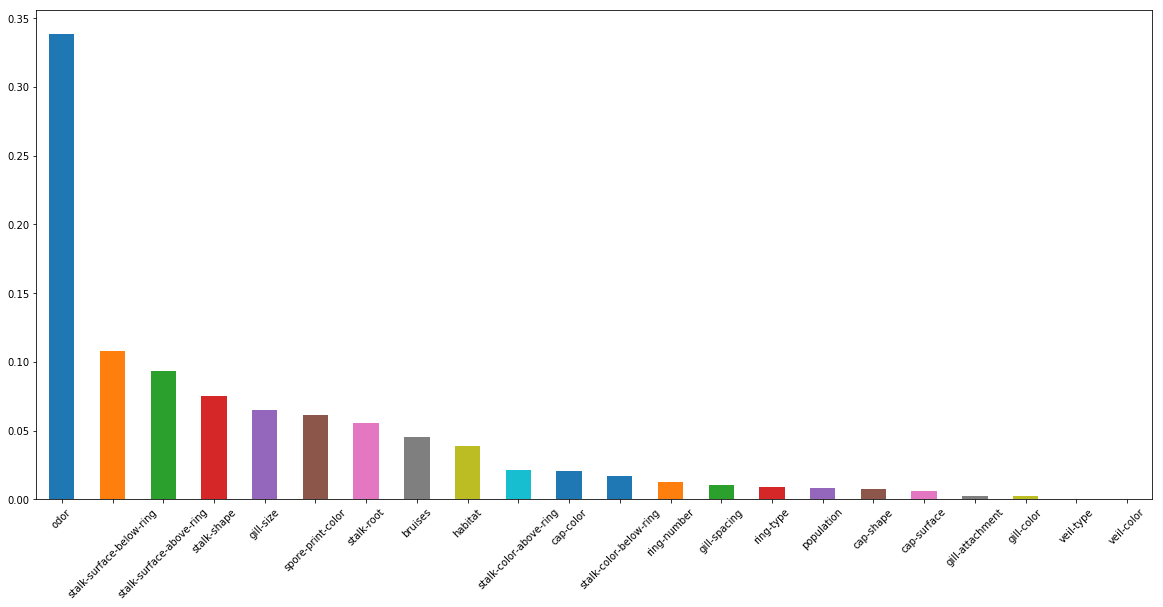

In [69]:
feat_importances.plot(kind='bar', figsize=(20,9), rot=45, fontsize=10)
plt.show()

Now we get a different feature importances plot. Most of them are similar but `stalk-shape` is actually the 4th most important feature while in the other case it was almost non-important. Working with missing values may be causing this disagreement, so we will stick with this last result, because even if we have less data, it has proven to be enough to get a perfect score.

Let's see how many features we need to get a perfect score.

In [70]:
def rf_score(n_features):
    
    """"
    Returns the score of the random forest using the n_features most important features
    """
    
    # Slices the list of names of features sorted by importance from the most important until n_features
    X = mushrooms_without_NaN[list(feat_importances.index)[0:n_features]]
    X = pd.get_dummies(X).values
    y = mushrooms_without_NaN["class"].values
    le = LabelEncoder()
    y = le.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    forest = RandomForestClassifier(random_state = 0)
    forest.fit(X_train, y_train)
    return forest.score(X_test, y_test)

In [71]:
for i in range(1, len(feat_importances.index)):
    if rf_score(i) == 1:
        print(i)
        break

8


In this case we need 8 features out of the original 23 to get 100% percent accuracy. 

In [72]:
list(feat_importances.index)[0:8]

['odor',
 'stalk-surface-below-ring',
 'stalk-surface-above-ring',
 'stalk-shape',
 'gill-size',
 'spore-print-color',
 'stalk-root',
 'bruises']

In [73]:
subset = list(feat_importances.index)[0:8]
subset.append("class")
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN[subset])
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


# 5. Support Vector Machine <a name="svm"></a>

For the rest of the classifiers, let's use the dataset without `stalk-root`, as we have seen that it is not needed to get a perfect score.

In [74]:
from sklearn.svm import SVC

In [75]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)
svm = train_and_test(SVC(random_state = 0), [X_train, y_train], [X_test, y_test])

0.9983586376692655


Let's tune the hyperparameters.

In [76]:
pipe = Pipeline([('clf', SVC(random_state = 0))])

In [77]:
param_grid = [{'clf__C': [0.01, 0.1, 1, 10, 100],
               'clf__gamma': [0.01, 0.1, 1, 10, 100],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]

This grid search is very slow for such large datasets, but still acceptable. (We will expand on this on the section using only easy-to-tell features).

In [78]:
#import time
#start = time.time()
#gs = GridSearchCV(estimator=pipe,
                      #param_grid=param_grid,
                      #scoring='accuracy',
                      #cv=StratifiedKFold(n_splits=10,
                      #                   shuffle=True,
                      #                   random_state=0)) 
# Fit the pipeline
#gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
#print(gs.best_score_, gs.best_params_, gs.best_estimator_)
#print(time.time() - start) 

# Output:

# 1.0 {'clf__C': 0.01, 'clf__gamma': 1, 'clf__kernel': 'poly'} Pipeline(memory=None,
#     steps=[('clf', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
#  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
#  max_iter=-1, probability=False, random_state=0, shrinking=True,
#  tol=0.001, verbose=False))])
# 3607.864349126816

In [79]:
svm = train_and_test(SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
                     [X_train, y_train], [X_test, y_test])

1.0


Using only the most important features learned by random forest.

In [80]:
X_train, y_train, X_test, y_test = preprocess(mushrooms[['odor', 'stalk-surface-above-ring', 'gill-color', 'gill-size',
 'spore-print-color', 'stalk-surface-below-ring', 'ring-type', "class"]])
svm = train_and_test(SVC(), [X_train, y_train], [X_test, y_test])

0.9979482970865818


In [81]:
#import time
#start = time.time()
#gs = GridSearchCV(estimator=pipe,
                      #param_grid=param_grid,
                      #scoring='accuracy',
                      #cv=StratifiedKFold(n_splits=10,
                      #                   shuffle=True,
                      #                   random_state=0)) 
# Fit the pipeline
#gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators#
#print(gs.best_score_, gs.best_params_, gs.best_estimator_)
#print(time.time() - start) 

# Output:

# 1.0 {'clf__C': 0.01, 'clf__gamma': 1, 'clf__kernel': 'poly'} Pipeline(memory=None,
#     steps=[('clf', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
#  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
#  max_iter=-1, probability=False, random_state=0, shrinking=True,
#  tol=0.001, verbose=False))])
# 896.680046081543

In [82]:
X_train, y_train, X_test, y_test = preprocess(mushrooms[['odor', 'stalk-surface-above-ring', 'gill-color', 'gill-size',
 'spore-print-color', 'stalk-surface-below-ring', 'ring-type', "class"]])
svm = train_and_test(SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
                     [X_train, y_train], [X_test, y_test])

1.0


# 6. K-Nearest Neighbors <a name="knn"></a>

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)
knn = train_and_test(KNeighborsClassifier(), [X_train, y_train], [X_test, y_test])

1.0


# 7. Naive Bayes <a name="NB"></a>

In [85]:
from sklearn.naive_bayes import GaussianNB

In [86]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)
svm = train_and_test(GaussianNB(), [X_train, y_train], [X_test, y_test])

0.9876897825194911


In [87]:
pipe = Pipeline([('clf', GaussianNB())])

param_grid = {'clf__priors': [None],
               'clf__var_smoothing': [1e-9]}

gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0)) 
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
print(gs.best_score_, gs.best_params_, gs.best_estimator_)

gs.best_estimator_.score(X_test, y_test)

0.9875131902919452 {'clf__priors': None, 'clf__var_smoothing': 1e-09} Pipeline(memory=None,
     steps=[('clf', GaussianNB(priors=None, var_smoothing=1e-09))])


0.9876897825194911

In [88]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)

pipe = Pipeline([('clf', GaussianNB())])

param_grid = {'clf__priors': [None],
               'clf__var_smoothing': [1e-9]}

gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0)) 
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
print(gs.best_score_, gs.best_params_, gs.best_estimator_)

gs.best_estimator_.score(X_test, y_test)

0.9982278481012659 {'clf__priors': None, 'clf__var_smoothing': 1e-09} Pipeline(memory=None,
     steps=[('clf', GaussianNB(priors=None, var_smoothing=1e-09))])


0.9988186650915535

As expected, it works better for less data and with all columns (we will also expand on this later).

In [89]:
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0, stratify = y_train)

In [90]:
gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0)) 
# Fit the pipeline
gs = gs.fit(X_trainn, y_trainn)
    
# Update best_score_param_estimators
print(gs.best_score_, gs.best_params_, gs.best_estimator_)

0.9971066907775769 {'clf__priors': None, 'clf__var_smoothing': 1e-09} Pipeline(memory=None,
     steps=[('clf', GaussianNB(priors=None, var_smoothing=1e-09))])


In [91]:
gs.best_estimator_.score(X_testt, y_testt)

1.0

# 8. Clustering <a name="cluster"></a>

We are also goint to implement clustering for supervised learning by removing all the labels from the training data minus two unique ones, fit the model on this data and use a map to assign the clusters indexes to the original labels, and finally compare with the predicted testing labels by a combination of the clustering and this map.

In [92]:
from sklearn.cluster import KMeans

In [93]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root) 
# Gets the indexes of the unique class labels
classes, indices = np.unique(y_train, return_index=True)
# Removes lables from y_train minus two unique ones
y_train = np.array([y_train[i] if i in indices else -1 for i in range(y_train.shape[0])])

In [94]:
km = KMeans(n_clusters=2, random_state=0)   
# Computes the clusters for the training data
y_train_pred = km.fit_predict(X_train)
# Gets the map of the clusters indexes to the original labels
dict_ = {}
dict_[0] = 1 # This was done by direct visualization
dict_[1] = 0 # Because it missclassified some of the first labels, a lopp would not work
# Uses the clustering on the testing data
y_test_pred = km.predict(X_test)
# And the map to get back the original labels
y_test_pred = np.array([dict_[key] for key in y_test_pred])
# Computes the accuracy comparing with the real labels
from sklearn.metrics import precision_recall_fscore_support
print('Accuracy:', end=' ')
print(precision_recall_fscore_support(y_test_pred, y_test, average='micro')[0])

Accuracy: 0.9043906442347148


The accuracy is very good considering that we almost have no labels. However, this is just an extra and will not be used on a real application as we are very concerned with 100% accuracy.

## Using only most significant features

In [95]:
# Gets the predictor features 
X = mushrooms[['odor','stalk-surface-above-ring','gill-color','gill-size',
                                  'spore-print-color','stalk-surface-below-ring','ring-type', "class"]]
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)
# Gets the indexes of the unique class labels
classes, indices = np.unique(y_train, return_index=True)
# Removes lables from y_train minus two unique ones
y_train = np.array([y_train[i] if i in indices else -1 for i in range(y_train.shape[0])])

In [96]:
km = KMeans(n_clusters=2, random_state=2)   
y_train_pred = km.fit_predict(X_train)
print(y_train[:5])
print(y_train_pred[:5])
dict_ = {}
dict_[0] = 1
dict_[1] = 0
y_test_pred = km.predict(X_test)
y_test_pred = np.array([dict_[key] for key in y_test_pred])
from sklearn.metrics import precision_recall_fscore_support
print('Accuracy:', end=' ')
print(precision_recall_fscore_support(y_test_pred, y_test, average='micro')[0])

[ 0 -1 -1  1 -1]
[0 1 1 0 1]
Accuracy: 0.9043906442347148


# Part 2: Using only the easy-to-tell features <a name="easyfeat"></a>


In the previous section we used all the features on the dataset to learn perfect models and get the importance of each feature. However, some of the features are not easy to classify for a novice mushroom hunter, and some times not even for experts. Thus, now we are going to use only the features we believe to be easy enough to classify, which are 

* Cap Shape
* Cap Color
* Bruises
* Gill Color
* Stalk Shape
* Stalk Root
* Stalk Color
* Veil Color
* Ring Number
* Ring Type
* Spore Print Color
* Population
* Habitat

We are also going to load all the modules again so that this section can be run without the need of running the previous section. 

In [97]:
# Gets the dataset with only the easy features
mushrooms_easy = mushrooms[['class', 'cap-shape', 'cap-color', 'bruises',
       'gill-color', 'stalk-shape', 'stalk-root', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]

In [98]:
# Gets the dataset without the problematic feature
mushrooms_no_stalk_root = mushrooms_easy.drop("stalk-root", axis = 1)
# Gets the raw dataset with missing values as np.NaN
mushrooms_raw_NaN = mushrooms_easy.replace("?", np.NaN)
# Gets the dataset without the rows containing missing values
mushrooms_without_NaN = mushrooms_raw_NaN.dropna()

In [99]:
# Imputes the missing values on the dataset
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
mushrooms_imputed = pd.DataFrame(imp.fit_transform(mushrooms_raw_NaN), columns = mushrooms_easy.columns)

In [100]:
# Run this if above cell gives an error
# mushrooms_imputed = mushrooms.replace("?", "b")

# 3. Logistic Regression <a name="logreg2"></a>

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [102]:
def preprocess(data):
    """
    Preprocesses the input dataset and returns the training and testing data to pass on the clasiffiers
    data: dataset to be used to learn the model (DataFrame with predictor features and target)
    """
    # Gets the predictor features 
    X = data.drop(["class"], axis=1)
    # And encodes them (they are all categorical)
    X = pd.get_dummies(X).values
    # Gets the target feature (binary)
    y = data["class"].values

    le = LabelEncoder()
    # Encodes the target
    y = le.fit_transform(y)

    # Splits between training and testing, stratifying by the target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    
    # No need to standardize as we only have 1s and 0s for all of our variables (they are all categorical).
    # This also makes it easier to interpret the decission tree in the next section 

    return X_train, y_train, X_test, y_test

def train_and_test(model, train_data, test_data):
    """
    Trains the model on the training data, prints the score for such model evaluating it on the testing data
    and also returns the learned model
    model: classifier to be used
    train_data: [X_train, y_train]
    test_data: [X_test, y_test]
    """
    # Fits the model to the training data 
    model.fit(train_data[0], train_data[1])
    # Evaluates the model using the testing data
    print(model.score(test_data[0], test_data[1]))
    # Returns the fitted model
    return model

## 3.1. Dataset without stalk-root <a name="logreg2.1"></a>

In [103]:
# Preprocesses the dataset
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)

In [104]:
# Trains and computes the accuracy of the sklearn default logistic regression on the testing data
# and also gets the learned model
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test])

0.9872794419368075


Based on the feature importances we got from the [logistic regression model](#logreg1.6) on the last section, we had seen that only `odor` was a very relevant predictor, so this such high score was to be expected when only using the easy-to-tell features. Let's see if we can improve it by hyperparameter tuning.

In [105]:
C_range = [10 ** i for i in range(-4, 5)]

def hypertune(param_grid, scoring):
    """
    Tunes the hyperparameters, prints the cross-validation and test scores, 
    the time it took, and returns the best model
    param_grid: grid of parameters to pass to GridSearchCV
    scoring: score metric to be used
    """
    
    pipe = Pipeline([('clf', LogisticRegression(random_state = 0))])

    import time
    start = time.time()
    gs = GridSearchCV(estimator=pipe,
                          param_grid=param_grid,
                          scoring=scoring,
                          cv=StratifiedKFold(n_splits=10,
                                             shuffle=True,
                                             random_state=0)) 
    # Fit the pipeline
    gs = gs.fit(X_train, y_train)

    print(time.time() - start)
    # Update best_score_param_estimators
    print(gs.best_score_, gs.best_params_, gs.best_estimator_)
    print(gs.best_estimator_.score(X_test, y_test))
    return gs.best_estimator_

In [106]:
#param_grid = {'clf__multi_class': ['ovr'], 
#               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#               'clf__C': C_range}
#best_logreg = hypertune(param_grid, "accuracy")

# Output:
#111.67471504211426
#0.9941962715441435 {'clf__C': 100, 'clf__multi_class': 'ovr', 'clf__solver': 'sag'} Pipeline(memory=None,
#     steps=[('clf', LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='ovr',
#          n_jobs=None, penalty='l2', random_state=0, solver='sag',
#          tol=0.0001, verbose=0, warm_start=False))])
#0.9938448912597456

We need to run this again with another parameter grid because `multi_class = multinomial` does not support `solver = liblinear`.

In [107]:
#param_grid = {'clf__multi_class': ['multinomial'], 
#               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
#               'clf__C': C_range}
#best_logreg = hypertune(param_grid, "accuracy")
# Output:
#174.70984292030334
#0.9941962715441435 {'clf__C': 100, 'clf__multi_class': 'multinomial', 'clf__solver': 'saga'} Pipeline(memory=None,
#     steps=[('clf', LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='multinomial',
#          n_jobs=None, penalty='l2', random_state=0, solver='saga',
#          tol=0.0001, verbose=0, warm_start=False))])
#0.9938448912597456

Let's get the confusion matrix to see the false positives (`edible = 0`, `poisonous = 1`), so in this case, a false positive means classifying an edible mushroom as poisonous, wich is much better than a false negative, i.e, classifying a poisonous mushroom as edible.

In [108]:
logreg = train_and_test(LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='sag',
          tol=0.0001, verbose=0, warm_start=False), [X_train, y_train], [X_test, y_test])

0.9938448912597456


In [109]:
from sklearn.metrics import confusion_matrix
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1250,   12],
       [   3, 1172]])

In [110]:
# https://stats.stackexchange.com/questions/95209/how-can-i-interpret-sklearn-confusion-matrix
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True) 

Predicted     0     1   All
True                       
0          1250    12  1262
1             3  1172  1175
All        1253  1184  2437

So we have 12 false positives and 3 false negatives, which is a very good result. However, let's see if we can drop the number of false negatives to zero. Because there is no score metric in *sklearn* to quantify the ability of the classifier to not to label as negative a sample that is positive, but there is one for the other way around ([precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)), we are going to change the encoding for the target, i.e, now `edible = 1` and `poisonous = 0`.

Thus, now we want to drop the number of false positives to zero, using the precision as scoring on the hyperparameter tuning.

In [111]:
mushrooms_no_stalk_root.head()

class cap-shape cap-color bruises gill-color stalk-shape  \
0     e         x         y       t          k           e   
1     e         b         w       t          n           e   
2     p         x         w       t          n           e   
3     e         x         g       f          k           t   
4     e         x         y       t          n           e   

  stalk-color-above-ring stalk-color-below-ring veil-color ring-number  \
0                      w                      w          w           o   
1                      w                      w          w           o   
2                      w                      w          w           o   
3                      w                      w          w           o   
4                      w                      w          w           o   

  ring-type spore-print-color population habitat  
0         p                 n          n       g  
1         p                 n          n       m  
2         p                 k          s       u  
3         e                 n          a       g  
4         p                 k          n       g

In [112]:
def preprocess_around(data):
    """
    Preprocesses the input dataset and returns the training and testing data to pass on the clasiffiers
    data: dataset to be used to learn the model (DataFrame with predictor features and target)
    """
    # Gets the predictor features 
    X = data.drop(["class"], axis=1)
    # And encodes them (they are all categorical)
    X = pd.get_dummies(X).values
    # Gets the target feature (binary)
    y = data["class"].values

    le = LabelEncoder()
    # Encodes the target
    y = le.fit_transform(y)
    # Turns the encoding around (0 for poisonous and 1 for edible)
    y_around = []
    for i in range(len(y)):
        if y[i] == 0:
            y_around.append(1)
        else:
            y_around.append(0)
    y_around = np.array(y_around)

    # Splits between training and testing, stratifying by the target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y_around, test_size = 0.3, random_state = 0, stratify = y_around)
    
    # No need to standardize as we only have 1s and 0s for all of our variables (they are all categorical).
    # This also makes it easier to interpret the decission tree in the next section 

    return X_train, y_train, X_test, y_test

In [113]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_no_stalk_root)
logreg = train_and_test(LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='sag',
          tol=0.0001, verbose=0, warm_start=False), [X_train, y_train], [X_test, y_test])

0.9922035289290111


In [114]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1171,    4],
       [  15, 1247]])

In [115]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True) 

Predicted     0     1   All
True                       
0          1171     4  1175
1            15  1247  1262
All        1186  1251  2437

In [116]:
#param_grid = {'clf__multi_class': ['ovr'], 
#               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#               'clf__C': C_range}
#best_logreg = hypertune(param_grid, "precision")

# Output:
#108.85104608535767
#0.9986356138327595 {'clf__C': 10, 'clf__multi_class': 'ovr', 'clf__solver': 'newton-cg'} Pipeline(memory=None,
#     steps=[('clf', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='ovr',
#          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
#          tol=0.0001, verbose=0, warm_start=False))])
#0.9922035289290111

In [117]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_no_stalk_root)
logreg = train_and_test(LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False), [X_train, y_train], [X_test, y_test])

0.9922035289290111


In [118]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1174,    1],
       [  18, 1244]])

In [119]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True) 

Predicted     0     1   All
True                       
0          1174     1  1175
1            18  1244  1262
All        1192  1245  2437

In [120]:
#param_grid = {'clf__multi_class': ['multinomial'], 
#               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
#               'clf__C': C_range}
#best_logreg = hypertune(param_grid, "precision")

# Output:
# 204.0625228881836
#0.9986367755233194 {'clf__C': 10, 'clf__multi_class': 'multinomial', 'clf__solver': 'newton-cg'} Pipeline(memory=None,
#     steps=[('clf', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='multinomial',
#          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
#          tol=0.0001, verbose=0, warm_start=False))])
#0.9926138695116947

In [121]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_no_stalk_root)
logreg = train_and_test(LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False), [X_train, y_train], [X_test, y_test])

0.9926138695116947


In [122]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1173,    2],
       [  16, 1246]])

In [123]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True) 

Predicted     0     1   All
True                       
0          1173     2  1175
1            16  1246  1262
All        1189  1248  2437

Well, we were able to drop the number of poisonous mushrooms identified as edible to only 1 out of 1174! This is a very good result, but we do not want anyone to die, so let's keep trying to drop this to zero!

## 3.2 Raw dataset with missing values <a name="logreg2.2"></a>

In [124]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_raw_NaN)
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test])

0.9971276159212146


In [125]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1173,    2],
       [   5, 1257]])

In [126]:
#param_grid = {'clf__multi_class': ['ovr'], 
#               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#               'clf__C': C_range}
#best_logreg = hypertune(param_grid, "precision")

# Output:
#118.54426908493042
#1.0 {'clf__C': 10, 'clf__multi_class': 'ovr', 'clf__solver': 'newton-cg'} Pipeline(memory=None,
#     steps=[('clf', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='ovr',
#          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
#          tol=0.0001, verbose=0, warm_start=False))])
#1.0

In [127]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_raw_NaN)
logreg = train_and_test(LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False), [X_train, y_train], [X_test, y_test])

1.0


In [128]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1175,    0],
       [   0, 1262]])

Using all the features does give a perfect score, even in the presence of the missing values!

## 3.3 Raw dataset treating "?" as another class <a name="logreg2.3"></a>

In [129]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_easy)
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test])

0.9971276159212146


In [130]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1173,    2],
       [   5, 1257]])

In [131]:
#param_grid = {'clf__multi_class': ['ovr'], 
#               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#               'clf__C': C_range}
#best_logreg = hypertune(param_grid, "precision")

# Output:
#113.6818540096283
#1.0 {'clf__C': 10, 'clf__multi_class': 'ovr', 'clf__solver': 'newton-cg'} Pipeline(memory=None,
#     steps=[('clf', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='ovr',
#          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
#          tol=0.0001, verbose=0, warm_start=False))])
#1.0

In [132]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_raw_NaN)
logreg = train_and_test(LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False), [X_train, y_train], [X_test, y_test])

1.0


In [133]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1175,    0],
       [   0, 1262]])

Note that 3.2 and 3.3 give the same score. It seems that logistic regression performs the same for missing values as np.nan and for missing values as a new dummy feature, or at least in this case.

## 3.4 Dataset without rows with missing values <a name="logreg2.4"></a>

In [134]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test]) 

1.0


This one works without hyperparameter tuning. 

## 3.5 Imputing missing values <a name="logreg2.5"></a>

In [135]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_imputed)
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test])

0.9979482970865818


In [136]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1257,    5],
       [   0, 1175]])

In [137]:
#param_grid = {'clf__multi_class': ['ovr'], 
#               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#               'clf__C': C_range}
#best_logreg = hypertune(param_grid, "precision")

# Output:
#115.20286178588867
#1.0 {'clf__C': 100, 'clf__multi_class': 'ovr', 'clf__solver': 'newton-cg'} Pipeline(memory=None,
#     steps=[('clf', LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='ovr',
#          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
#          tol=0.0001, verbose=0, warm_start=False))])
#1.0

In [138]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_raw_NaN)
logreg = train_and_test(LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False), [X_train, y_train], [X_test, y_test])

1.0


In [139]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1175,    0],
       [   0, 1262]])

## 3.6 Features Importances <a name="logreg2.6"></a>

In [140]:
from sklearn.feature_selection import RFE
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)

In [141]:
logreg = LogisticRegression()
selector = RFE(logreg)
selector.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

In [142]:
# Gets the ranking of importance for each dummy variable
rankings = {}
cols = pd.get_dummies(mushrooms_without_NaN.drop("class", axis = 1)).columns
for i in range(len(selector.support_)):
    rankings[cols[i]] = selector.ranking_[i]

In [143]:
ranking_original = {}
# For each original feature (minus target)
for j in mushrooms_easy.columns[1:]:
    # Creates empty list
    ranks = []
    # For each dummy feature
    for i in rankings.keys():
        # If the name (string) of the original feature is in the name (string) of the dummy feature
        if j in i:
            # Appends the ranking of such dummy feature to the list
            ranks.append(rankings[i])
    # Computes the mean of the rankings of the dummy features corresponding to the original feature
    ranking_original[j] = np.mean(ranks) 

In [144]:
# Sorts the rankings in ascending order
sorted(ranking_original, key=ranking_original.get) # https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

['stalk-shape',
 'stalk-root',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'bruises',
 'stalk-color-below-ring',
 'habitat',
 'cap-color',
 'population',
 'ring-number',
 'stalk-color-above-ring',
 'cap-shape',
 'gill-color']

Now we can see how the most relevant easy features from before come out on top of the new feature importance ranking, which was to be expected. ![m](https://i.imgur.com/Eoiubc8.png) 

# 4. Decision Tree and Random Forest <a name="dtrf1"></a>

# 4.1 Decision Tree <a name="dt1"></a>

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

def tree_plot_(tree, data):
    """
    Returns the graph to plot the decision tree
    tree: decision tree to be plotted
    data: dataset used to learn the tree
    """
    dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['p', # p comes firts because it is assigned a 0 by the LabelEncoder (when we use preprocess_around)
                                        'e'],
                           feature_names=pd.get_dummies(data.drop(["class"], axis=1)).columns,
                           out_file=None) 

    return graph_from_dot_data(dot_data) 

## 4.1.1 Dataset without stalk-root <a name="dt1.1"></a>

In [146]:
# Preprocesses the dataset
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)

In [147]:
# Trains and computes the accuracy of the sklearn default decision tree on the testing data
# and also gets the learned tree
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

0.993434550677062


In [148]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_no_stalk_root)

In [149]:
def hypertune_tree(param_grid, scoring):
    """
    Tunes the hyperparameters, prints the cross-validation and test scores, 
    the time it took, and returns the best model
    param_grid: grid of parameters to pass to GridSearchCV
    scoring: score metric to be used
    """
    
    pipe = Pipeline([('clf', DecisionTreeClassifier(random_state = 0))])

    import time
    start = time.time()
    gs = GridSearchCV(estimator=pipe,
                          param_grid=param_grid,
                          scoring=scoring,
                          cv=StratifiedKFold(n_splits=10,
                                             shuffle=True,
                                             random_state=0)) 
    # Fit the pipeline
    gs = gs.fit(X_train, y_train)

    print(time.time() - start)
    # Update best_score_param_estimators
    print(gs.best_score_, gs.best_params_, gs.best_estimator_)
    print(gs.best_estimator_.score(X_test, y_test))
    return gs.best_estimator_

In [150]:
param_grid = {'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}

best_tree = hypertune_tree(param_grid, "precision")

1.499000072479248
0.9942453125944944 {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10} Pipeline(memory=None,
     steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))])
0.993434550677062


In [151]:
tree = train_and_test(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'), [X_train, y_train], [X_test, y_test])

0.993434550677062


In [152]:
y_test_pred = tree.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1167,    8],
       [   8, 1254]])

In [153]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True) 

Predicted     0     1   All
True                       
0          1167     8  1175
1             8  1254  1262
All        1175  1262  2437

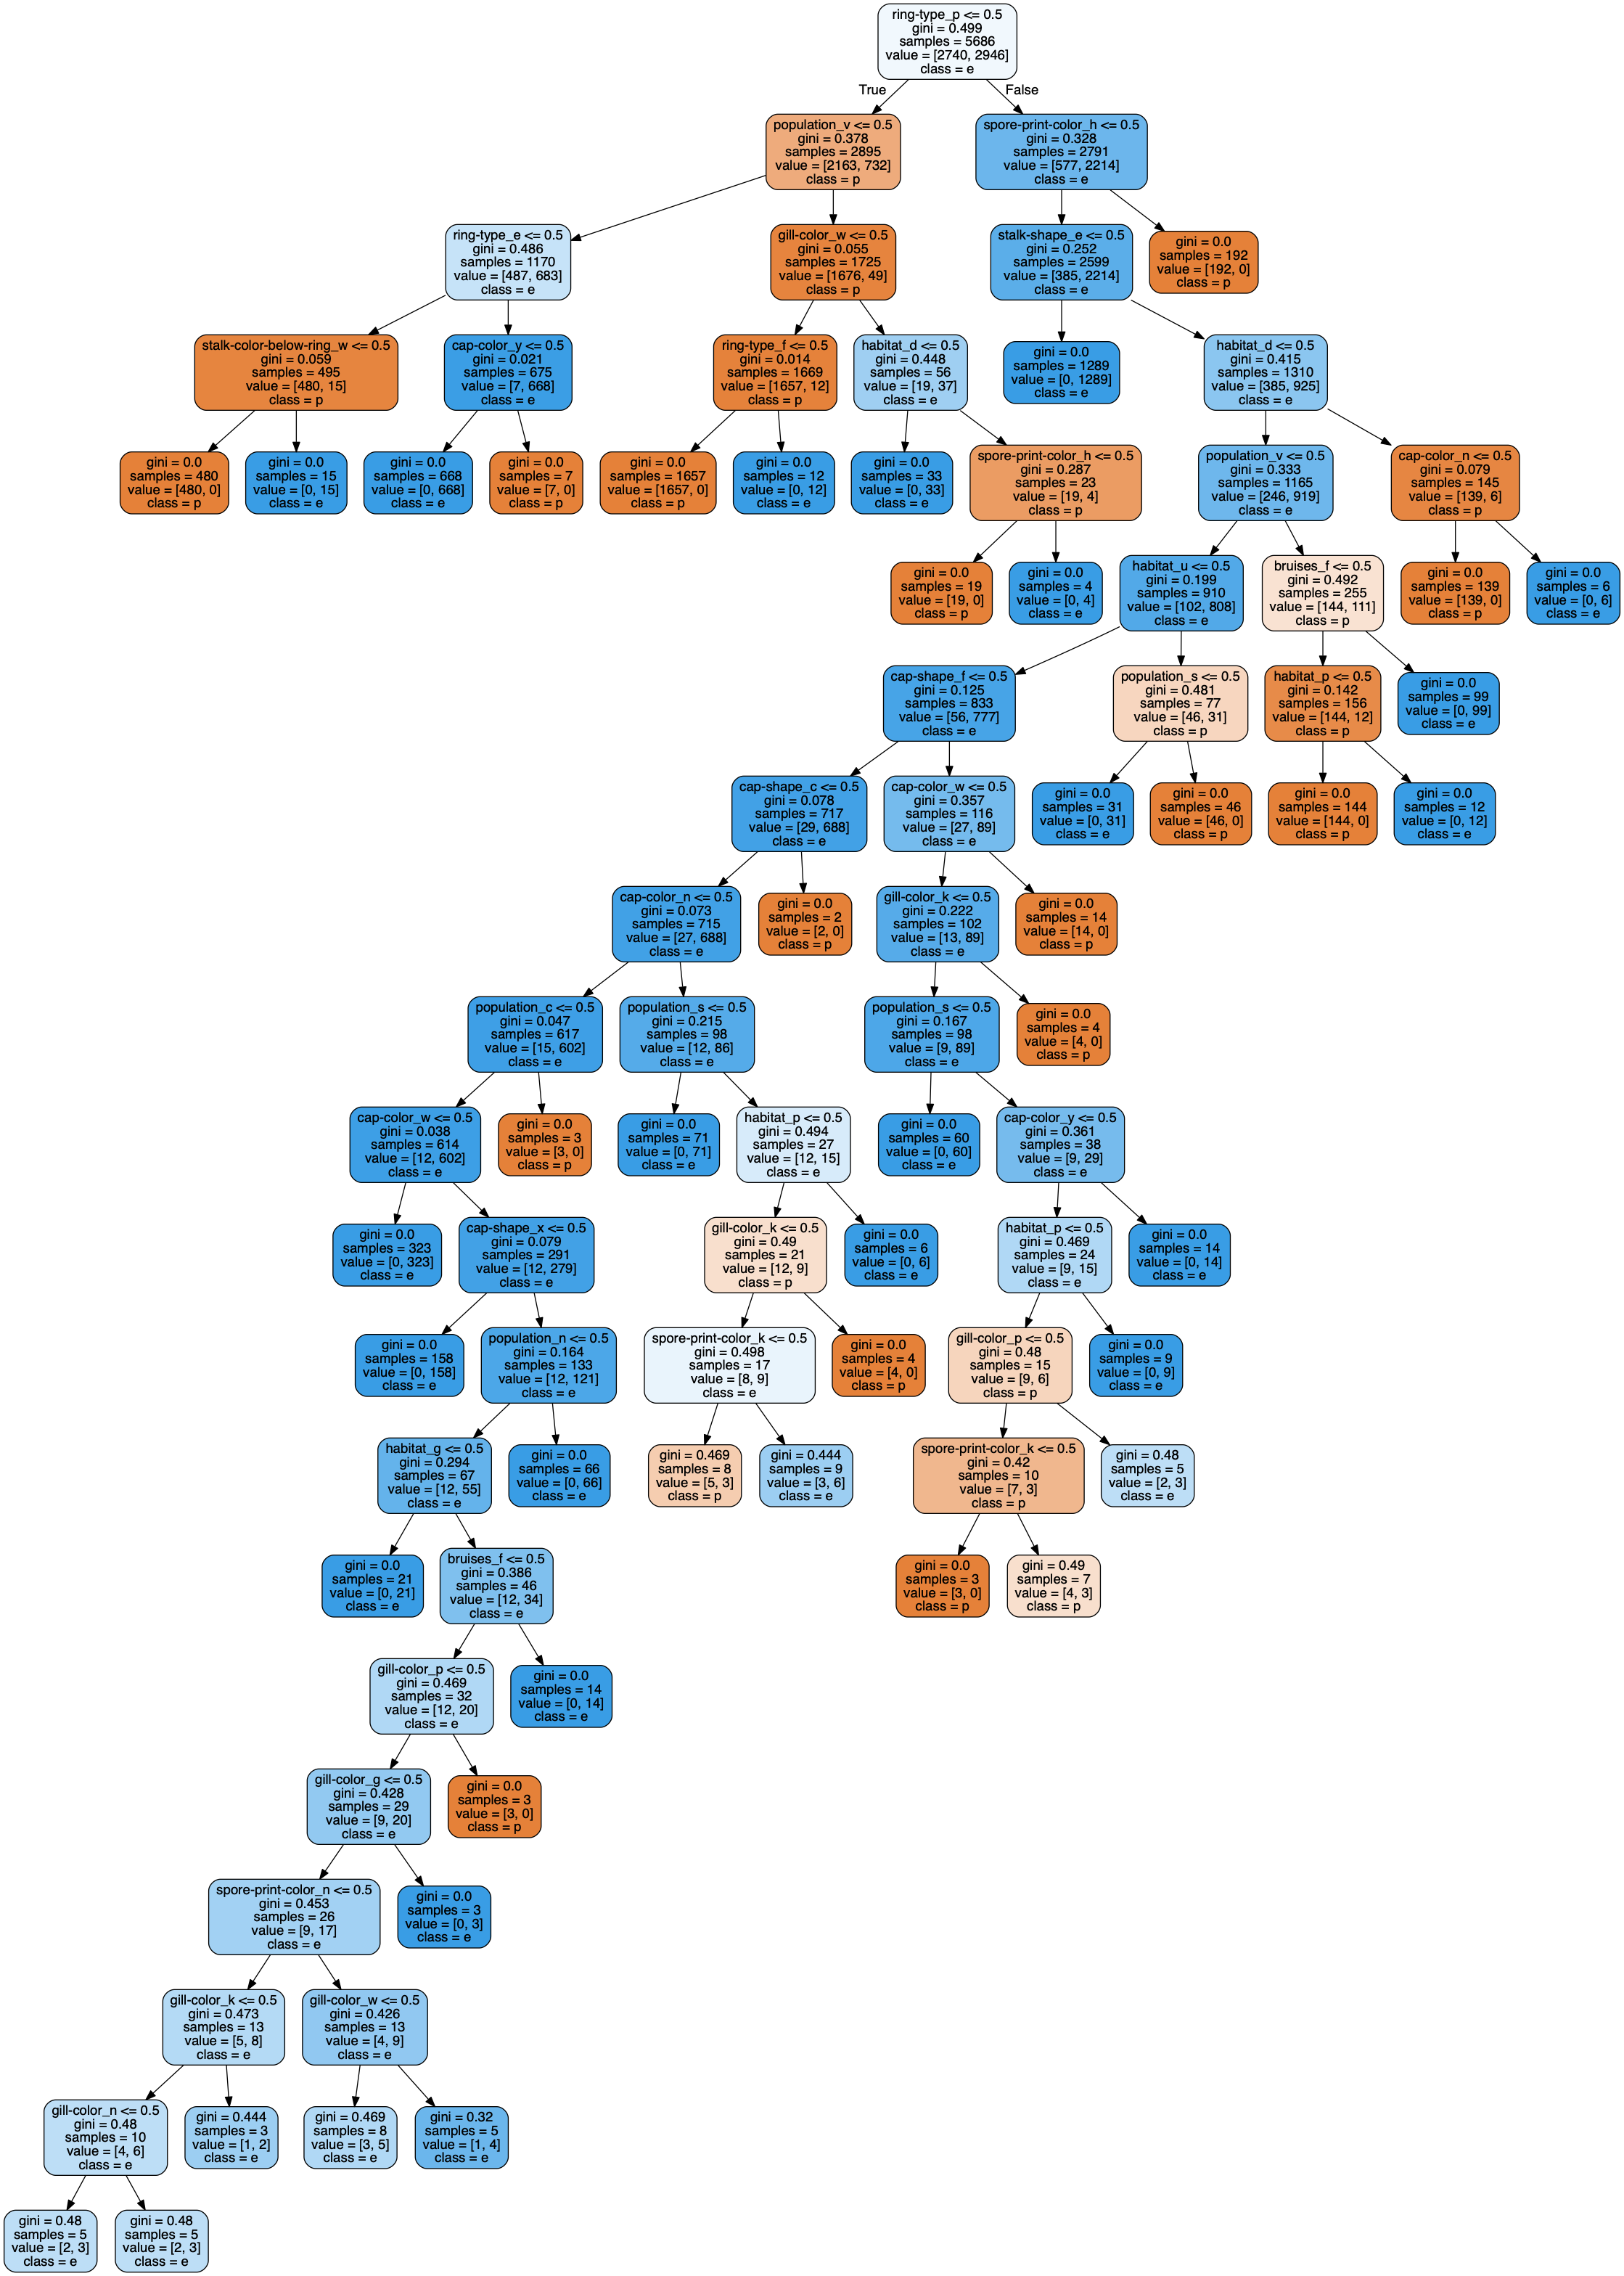

In [154]:
# Plots the tree we just learned
graph = tree_plot_(tree, mushrooms_no_stalk_root)
Image(graph.create_png()) 

In [155]:
tree.tree_.node_count

89

Wow, look at that tree... it's complexity is huge! This is because we are not using `stalk-root`, which when we only use the easy-to-tell features becomes one of the most relevants so we need to use a huge combination of rules using the rest of the features to get the best score, which still gives 8 false positives. 

## 4.1.2 Raw dataset with missing values <a name="dt1.2"></a>

In [156]:
# Preprocesses the dataset
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_raw_NaN)

In [157]:
# Trains and computes the accuracy of the sklearn default decision tree on the testing data
# and also gets the learned tree
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


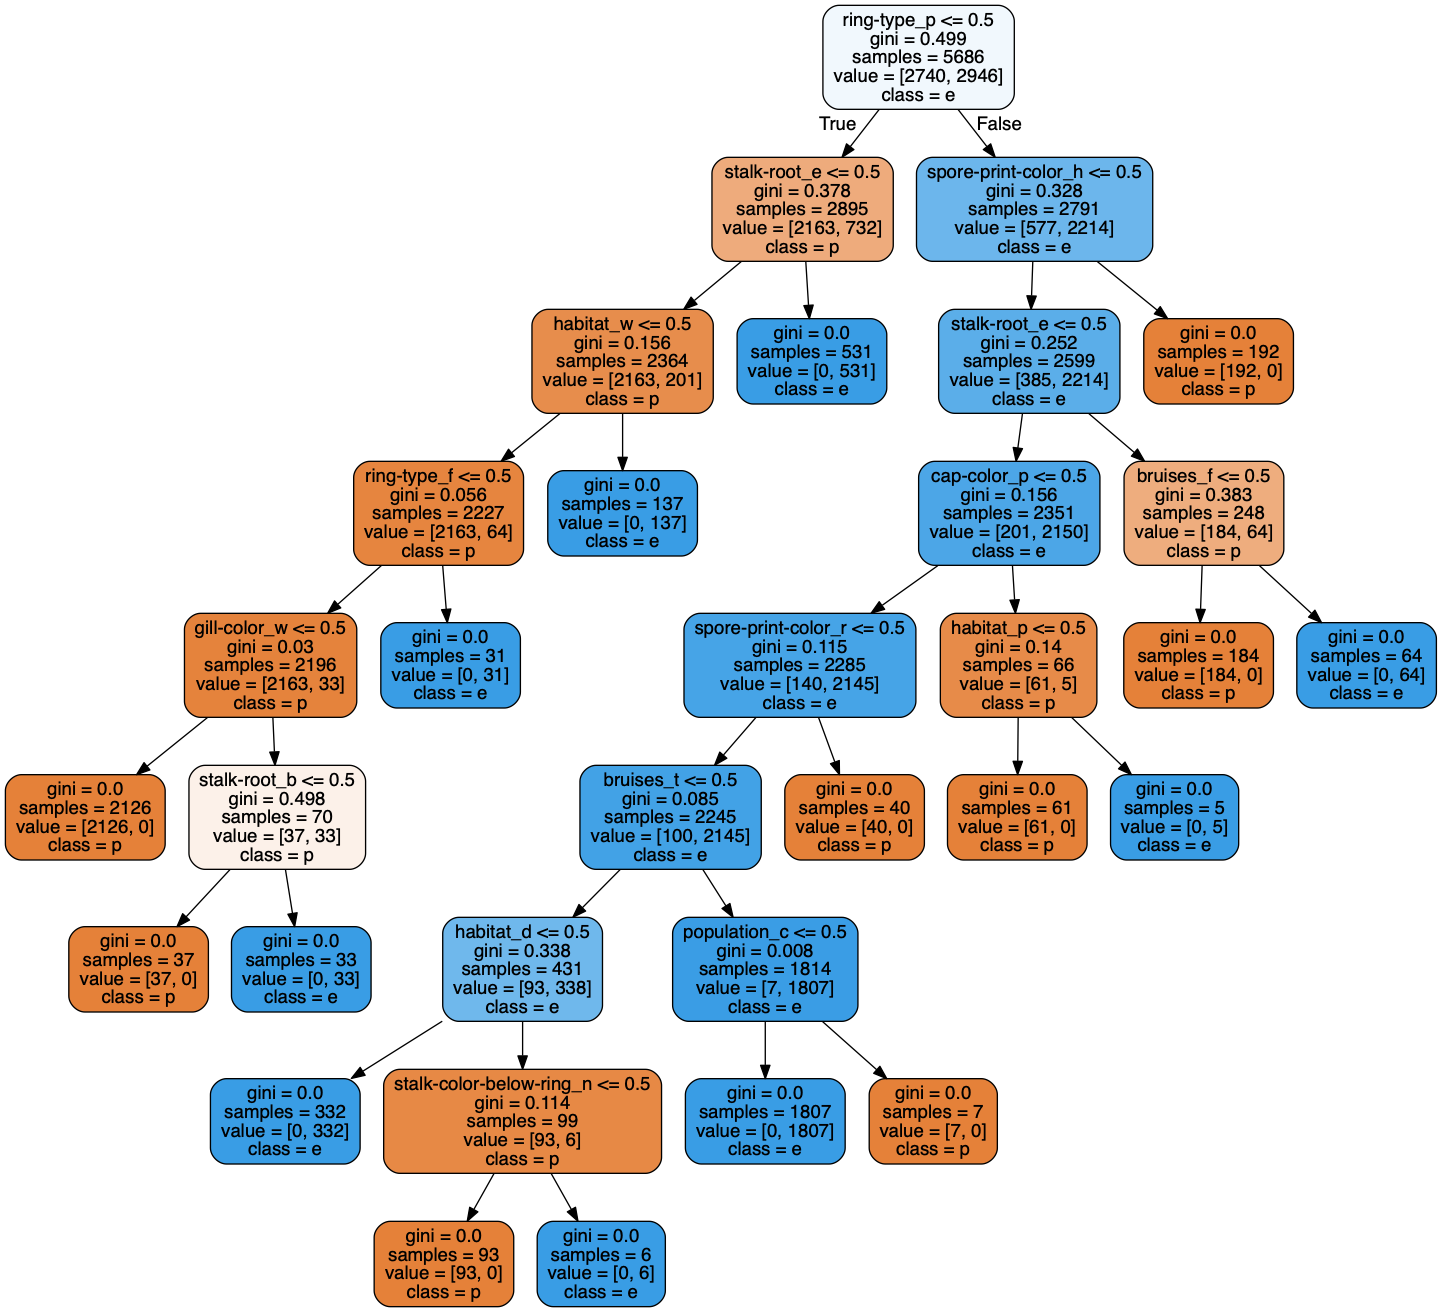

In [158]:
# Plots the tree we just learned
graph = tree_plot_(tree, mushrooms_raw_NaN)
Image(graph.create_png()) 

In [159]:
tree.tree_.node_count

33

As we expected, the complexity is lower but still higher than when using all the features, including the hard ones to classify. However, we are able to get a perfect tree in this case.

## 4.1.3 Raw dataset treating "?" as another class <a name="dt1.3"></a>

In [160]:
# Preprocesses the dataset
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_easy)

In [161]:
# Trains and computes the accuracy of the sklearn default decision tree on the testing data
# and also gets the learned tree
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


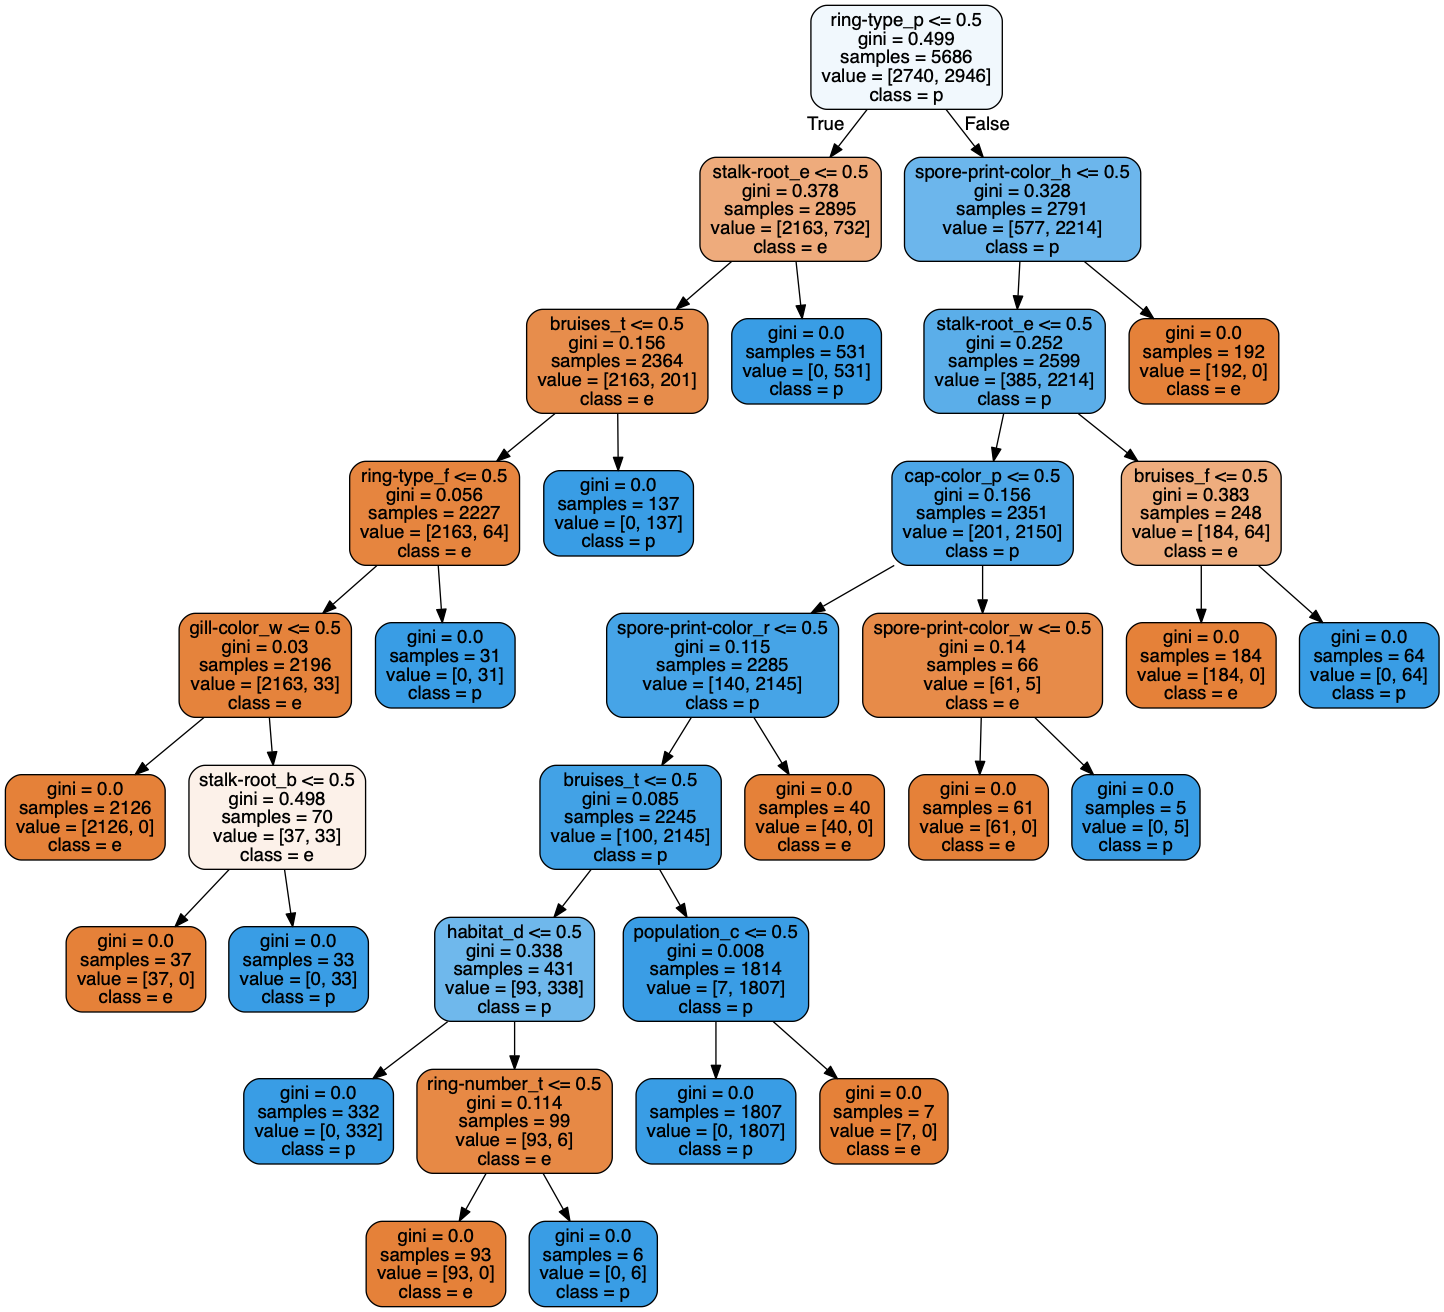

In [162]:
# Plots the tree we just learned
graph = tree_plot(tree, mushrooms_easy)
Image(graph.create_png()) 

In [163]:
tree.tree_.node_count

33

Same score, the tree does change a little bit but not so much.

## 4.1.4 Dataset without rows with missing values <a name="dt1.4"></a>

In [164]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_without_NaN)
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


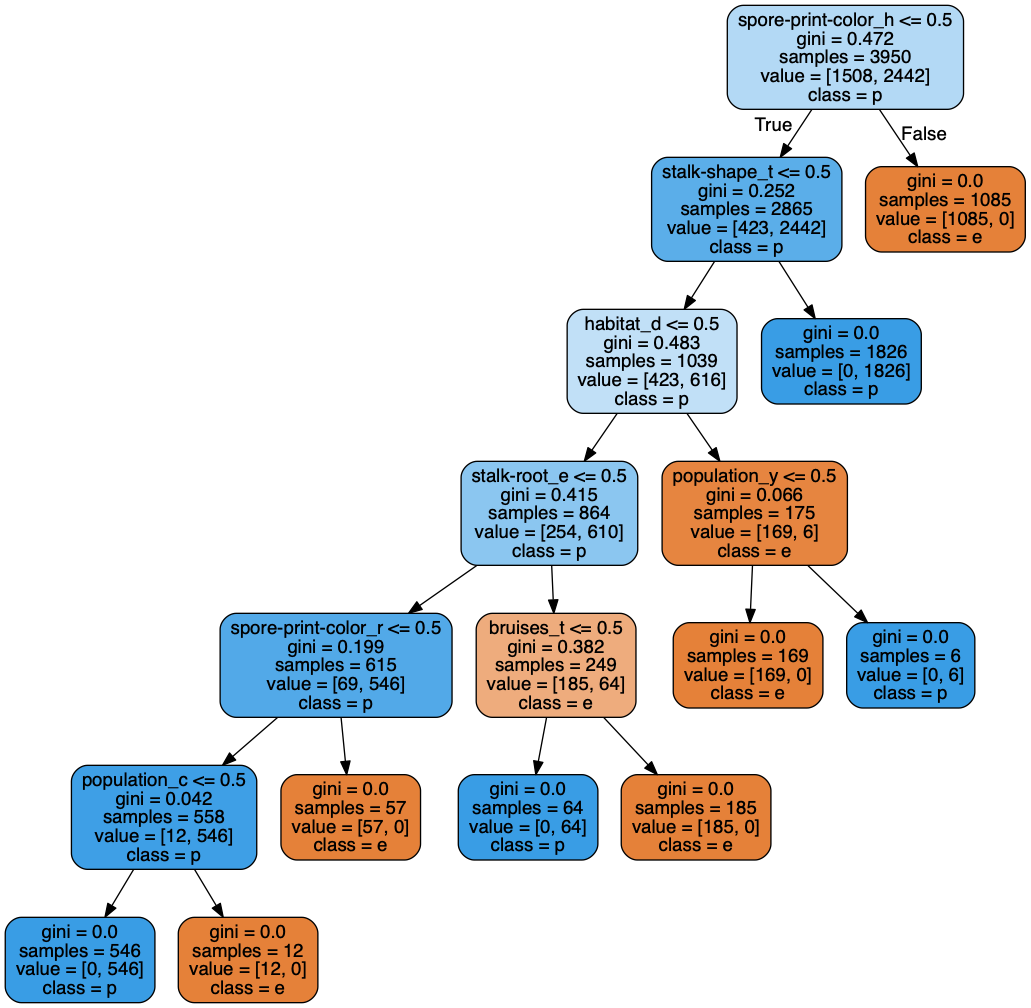

In [165]:
graph = tree_plot(tree, mushrooms_without_NaN) 
Image(graph.create_png())

In [166]:
tree.tree_.node_count

17

In this case the abscense of missing values makes the tree simpler, and we also get a perfect score, so this seems the best result for now!

## 4.1.5 Imputing missing values <a name="dt1.5"></a>

In [167]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_imputed)
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


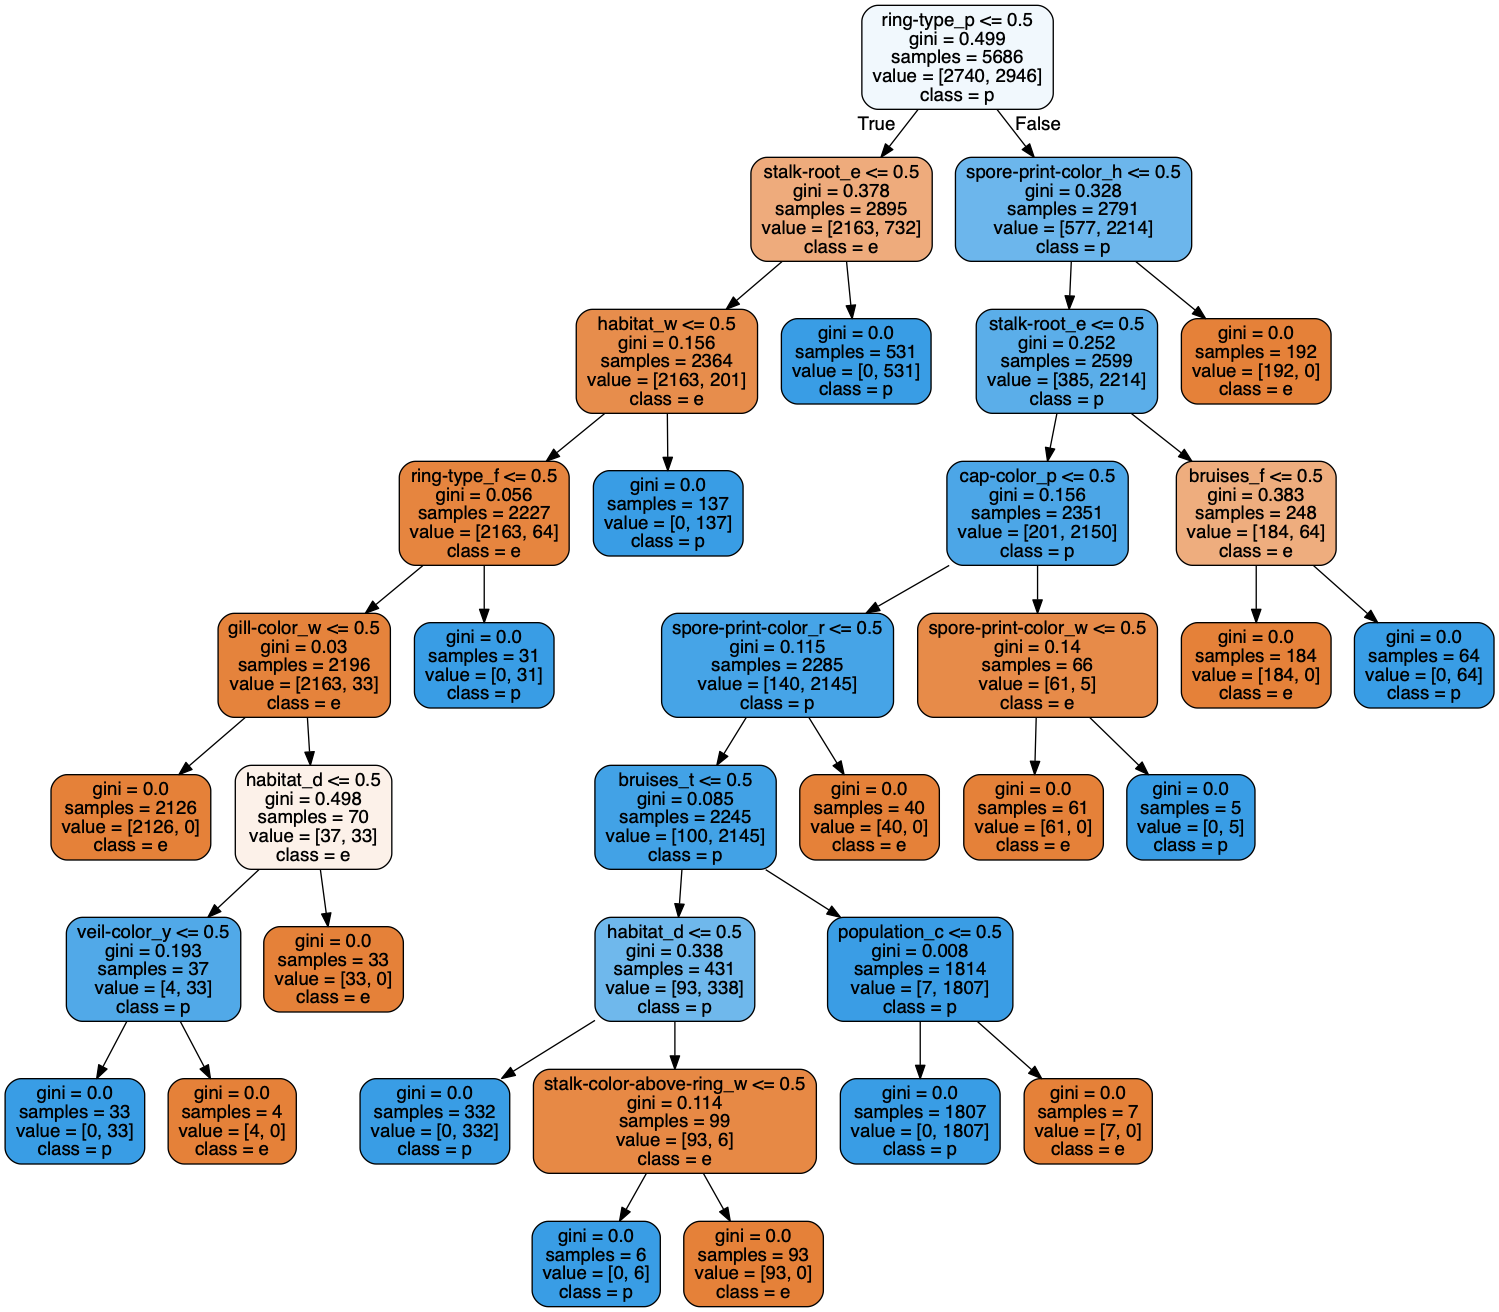

In [168]:
graph = tree_plot(tree, mushrooms_imputed)  
Image(graph.create_png())

In [169]:
tree.tree_.node_count

35

By imputing the missing values and using all data with all features, we get a more complex tree, which makes sense, because we have more data but some of them with incorrect values for `stalk-root`, which makes it harder for the model to learn a simple tree.

# 4.2 Random Forest <a name="rf1"></a>

For the rest of the classifiers, let's only use the data without the rows with the missing values, as we have seen that it is the best choice in this case.

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


Now let's get the features importances.

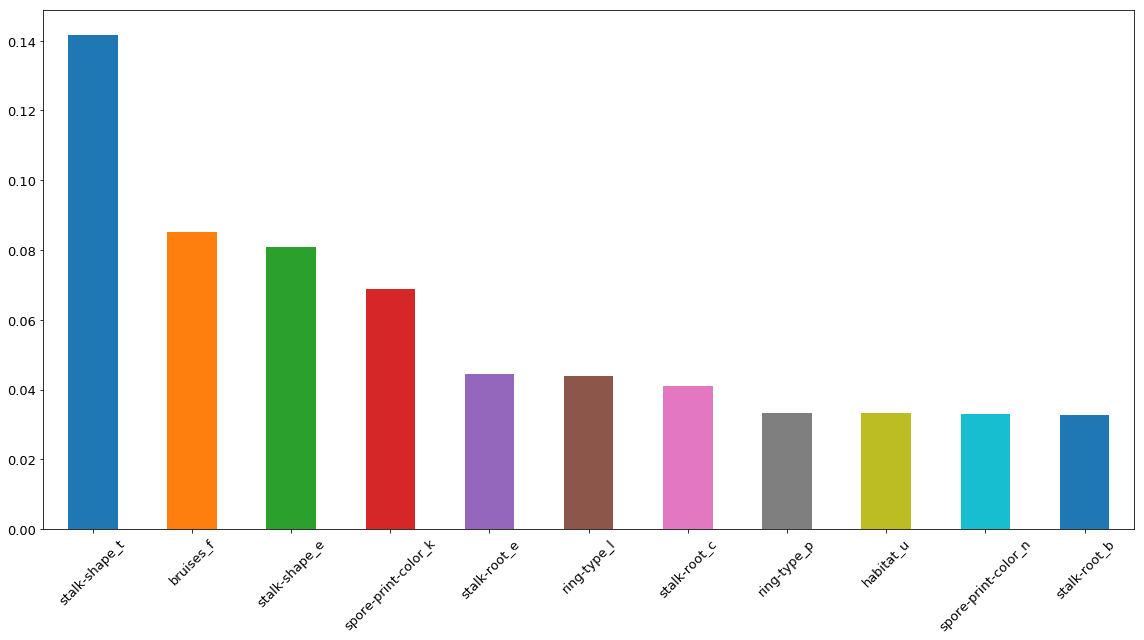

In [172]:
# Gets the importance of each features
importances = forest.feature_importances_
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, pd.get_dummies(mushrooms_without_NaN.drop(["class"], axis=1)).columns)
# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)
# Get the top 10 most important features
f_importances_top_10 = f_importances.iloc[0:11]
# Draws the bar Plot for the 10 most important features 
f_importances_top_10.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=13)
# Show the plot
plt.tight_layout()
plt.show()

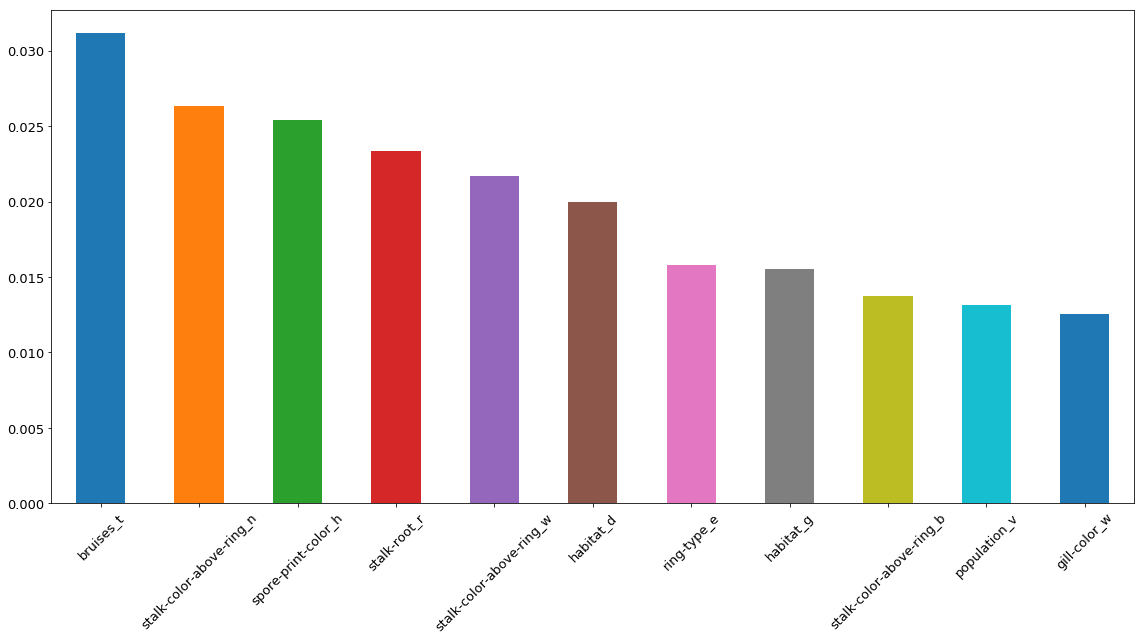

In [173]:
f_importances_top_20 = f_importances.iloc[11:22] 
f_importances_top_20.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=13)
plt.tight_layout()
plt.show()

Let's compute the original features importance by adding up the importances of each of its corresponding dummy variables.

In [174]:
# Names of the dummy variables
features = pd.get_dummies(mushrooms_without_NaN.drop(["class"], axis=1)).columns
# Computes this again because we don't wont it sorted
f_importances = pd.Series(importances, features) 
importa_dict = {}
# For each feature in the original dataframe
for i in mushrooms_without_NaN.drop("class", axis = 1).columns:
    # Assign this feature as key and the sum of the importances of every dummy variable corresponding to it as value
    importa_dict[i] = f_importances[features.str.contains(i)].sum() # Subsets f_importances with the columns containing the name 
    # "i", which is the original feature name, so it gets all the dummy columns "i_..."
feat_importances = pd.Series(importa_dict).sort_values(ascending=False)

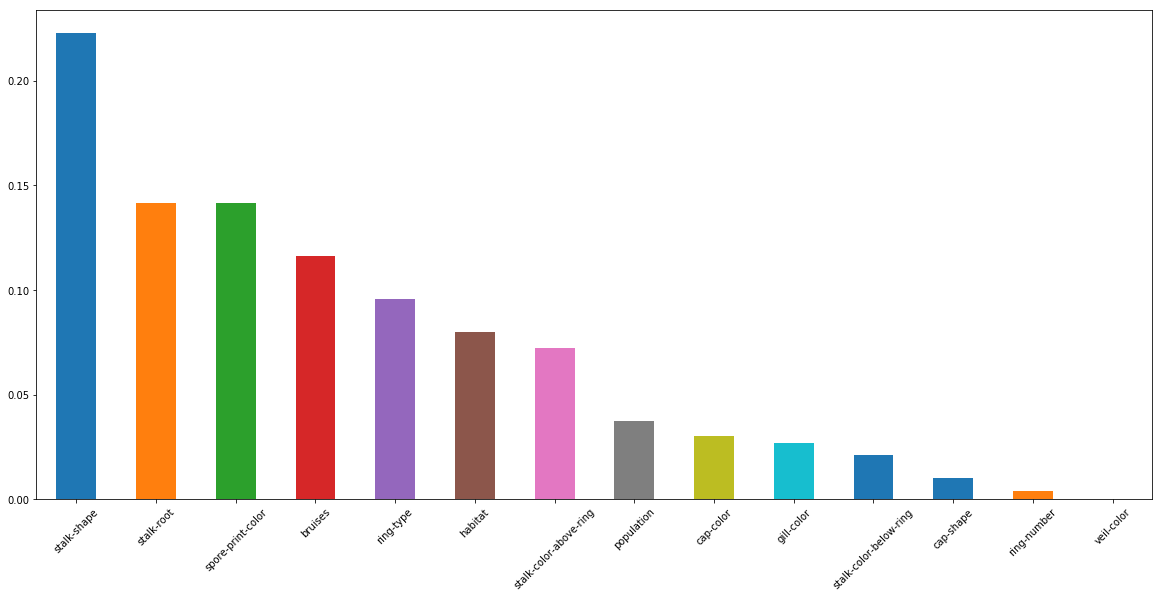

In [175]:
feat_importances.plot(kind='bar', figsize=(20,9), rot=45, fontsize=10)
plt.show()

Comparing with the feature importance ranking obtained through Logistic Regression 

In [176]:
sorted(ranking_original, key=ranking_original.get)

['stalk-shape',
 'stalk-root',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'bruises',
 'stalk-color-below-ring',
 'habitat',
 'cap-color',
 'population',
 'ring-number',
 'stalk-color-above-ring',
 'cap-shape',
 'gill-color']

we have some of them in the same place but others way off (such as `veil-color`). As explained before, Random Forest gives a more reliable result, so let's use this to see once again, the amount of features we need to get a perfect score.

In [177]:
def rf_score(n_features):
    
    """"
    Returns the score of the random forest using the n_features most important features
    """
    
    # Slices the list of names of features sorted by importance from the most important until n_features
    X = mushrooms_without_NaN[list(feat_importances.index)[0:n_features]]
    X = pd.get_dummies(X).values
    y = mushrooms_without_NaN["class"].values
    le = LabelEncoder()
    y = le.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    forest = RandomForestClassifier(random_state = 0)
    forest.fit(X_train, y_train)
    return forest.score(X_test, y_test)

In [178]:
for i in range(1, len(feat_importances.index)):
    if rf_score(i) == 1:
        print(i)
        break

6


In this case we only need 6 features out of the original 15 easy-to-tell features to get 100% percent accuracy. 

In [179]:
list(feat_importances.index)[0:6]

['stalk-shape',
 'stalk-root',
 'spore-print-color',
 'bruises',
 'ring-type',
 'habitat']

In [180]:
subset = list(feat_importances.index)[0:6]
subset.append("class")
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN[subset])
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


However, we are more interested on a perfect tree than on a perfect forest, so let's do the same for the Decision Tree Classifier.

In [181]:
def dt_score(n_features):
    
    """"
    Returns the score of the random forest using the n_features most important features
    """
    
    # Slices the list of names of features sorted by importance from the most important until n_features
    X = mushrooms_without_NaN[list(feat_importances.index)[0:n_features]]
    X = pd.get_dummies(X).values
    y = mushrooms_without_NaN["class"].values
    le = LabelEncoder()
    y = le.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    tree = DecisionTreeClassifier(random_state = 0)
    tree.fit(X_train, y_train)
    return tree.score(X_test, y_test)

In [182]:
for i in range(1, len(feat_importances.index)):
    if dt_score(i) == 1:
        print(i)
        break

6


In [183]:
subset = list(feat_importances.index)[0:6]
subset.append("class")
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_without_NaN[subset]) 
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


Well, we still have a perfect score with the top 6 features. Let's plot this tree.

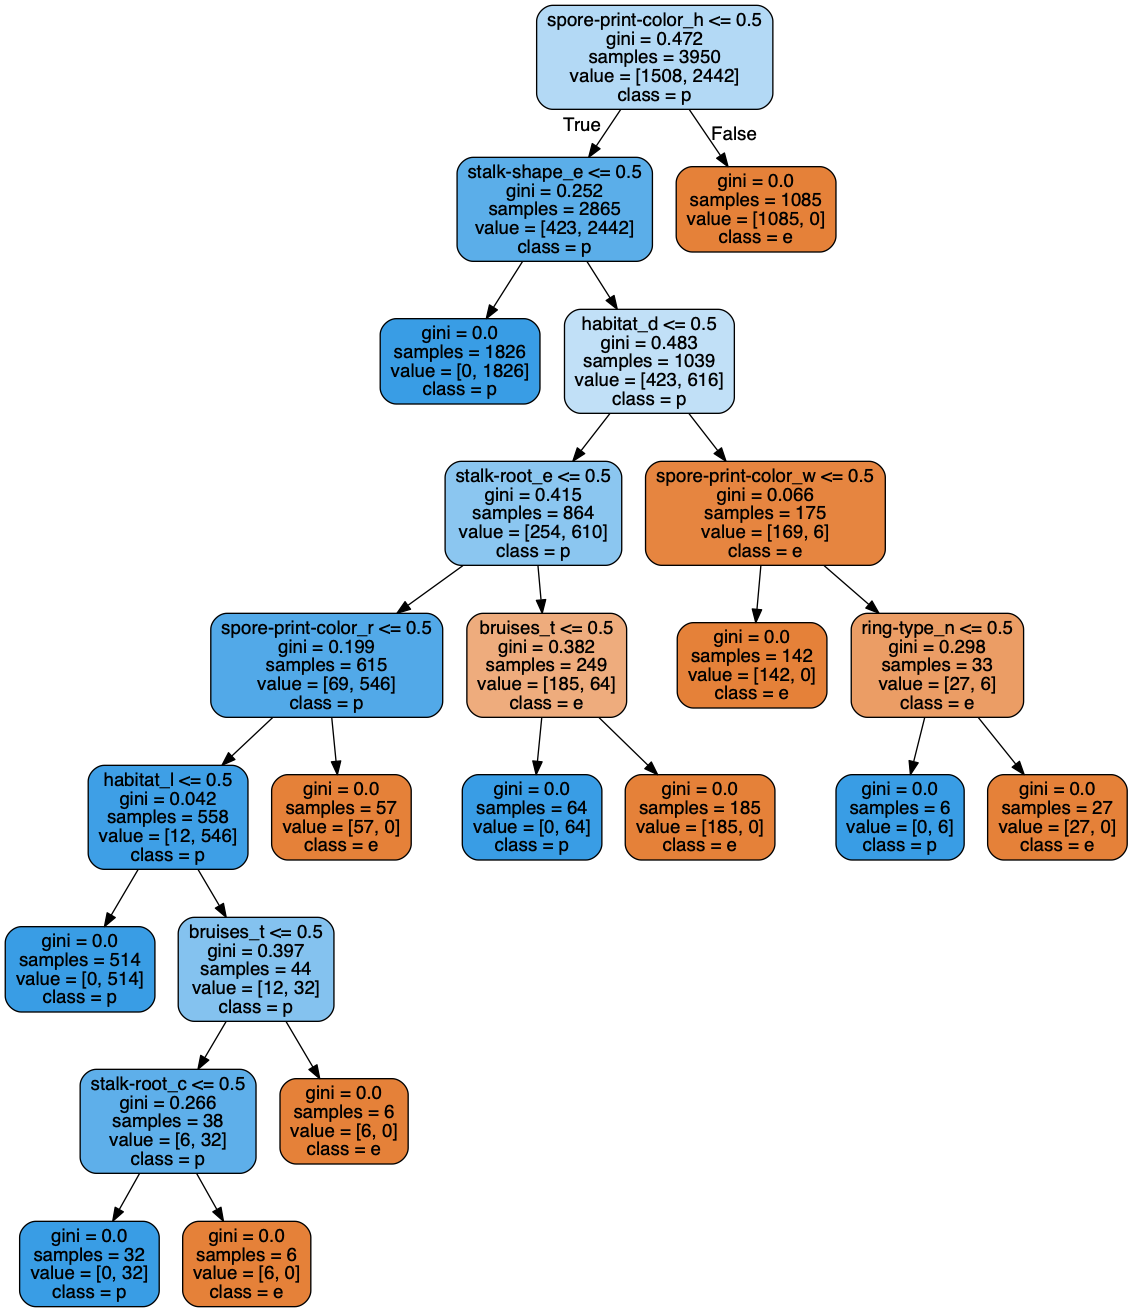

In [184]:
# Plots the tree we just learned
graph = tree_plot(tree, mushrooms_without_NaN[subset])
Image(graph.create_png()) 

In [185]:
tree.tree_.node_count

23

We are not getting a simpler tree, which wasn't expected. Maybe it's because we are using the original features and not the dummy variables. Let's use the dummies instead.

In [186]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_without_NaN)
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


In [187]:
# Gets the importance of each features
importances = forest.feature_importances_
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, pd.get_dummies(mushrooms_without_NaN.drop(["class"], axis=1)).columns)
# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

In [188]:
def dt_score_dummy(n_features):
    
    """"
    Returns the score of the random forest using the n_features most important features
    """
    
    X = pd.get_dummies(mushrooms_without_NaN.drop("class", axis = 1))
    X = X[list(f_importances.index)[0:n_features]].values
    y = mushrooms_without_NaN["class"].values
    le = LabelEncoder()
    y = le.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    tree = DecisionTreeClassifier(random_state = 0)
    tree.fit(X_train, y_train) 
    return tree.score(X_test, y_test)

In [189]:
for i in range(1, len(f_importances.index)):
    if dt_score_dummy(i) == 1:
        print(i)
        break

22


In [190]:
X = pd.get_dummies(mushrooms_without_NaN.drop("class", axis = 1))
X = X[list(f_importances.index)[0:22]].values
y = mushrooms_without_NaN["class"].values
le = LabelEncoder()
y = le.fit_transform(y)
y_around = [] 
for i in range(len(y)):
    if y[i] == 0:
        y_around.append(1)
    else:
        y_around.append(0)
y_around = np.array(y_around)
X_train, X_test, y_train, y_test = train_test_split(X, y_around, test_size = 0.3, random_state = 0, stratify = y)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

1.0

In [191]:
# Plots the tree we just learned
dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['p', # p comes firts because it is assigned a 0 by the LabelEncoder (when we use preprocess_around)
                                        'e'],
                           feature_names=f_importances.index[0:22],
                           out_file=None) 

Image(graph_from_dot_data(dot_data).create_png()) 

In [192]:
tree.tree_.node_count

25

We are still not getting a better tree... let's use the ranked features from the Logistic Regression.

In [193]:
features_ranked = sorted(ranking_original, key=ranking_original.get) 

In [194]:
def dt_score_(n_features):
    
    """"
    Returns the score of the random forest using the n_features most important features
    """
    
    # Slices the list of names of features sorted by importance from the most important until n_features
    X = mushrooms_without_NaN[features_ranked[0:n_features]]
    X = pd.get_dummies(X).values
    y = mushrooms_without_NaN["class"].values
    le = LabelEncoder()
    y = le.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    tree = DecisionTreeClassifier(random_state = 0)
    tree.fit(X_train, y_train)
    return tree.score(X_test, y_test)

In [195]:
for i in range(1, len(features_ranked)):
    if dt_score_(i) == 1:
        print(i)
        break

8


In [196]:
features_ranked[0:8] 

['stalk-shape',
 'stalk-root',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'bruises',
 'stalk-color-below-ring',
 'habitat']

In [197]:
subset = features_ranked[0:8] 
subset.append("class")
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_without_NaN[subset]) 
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


Well, now we have a perfect score with the top 8 features. Let's plot this tree.

In [198]:
# Plots the tree we just learned
graph = tree_plot(tree, mushrooms_without_NaN[subset])
Image(graph.create_png()) 

In [199]:
tree.tree_.node_count

21

We also get a similar result using the most relevant features from Logistic Regression, which is a bit more complex than the tree we obtained using all the easy-to-tell features:

In [200]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_without_NaN)
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


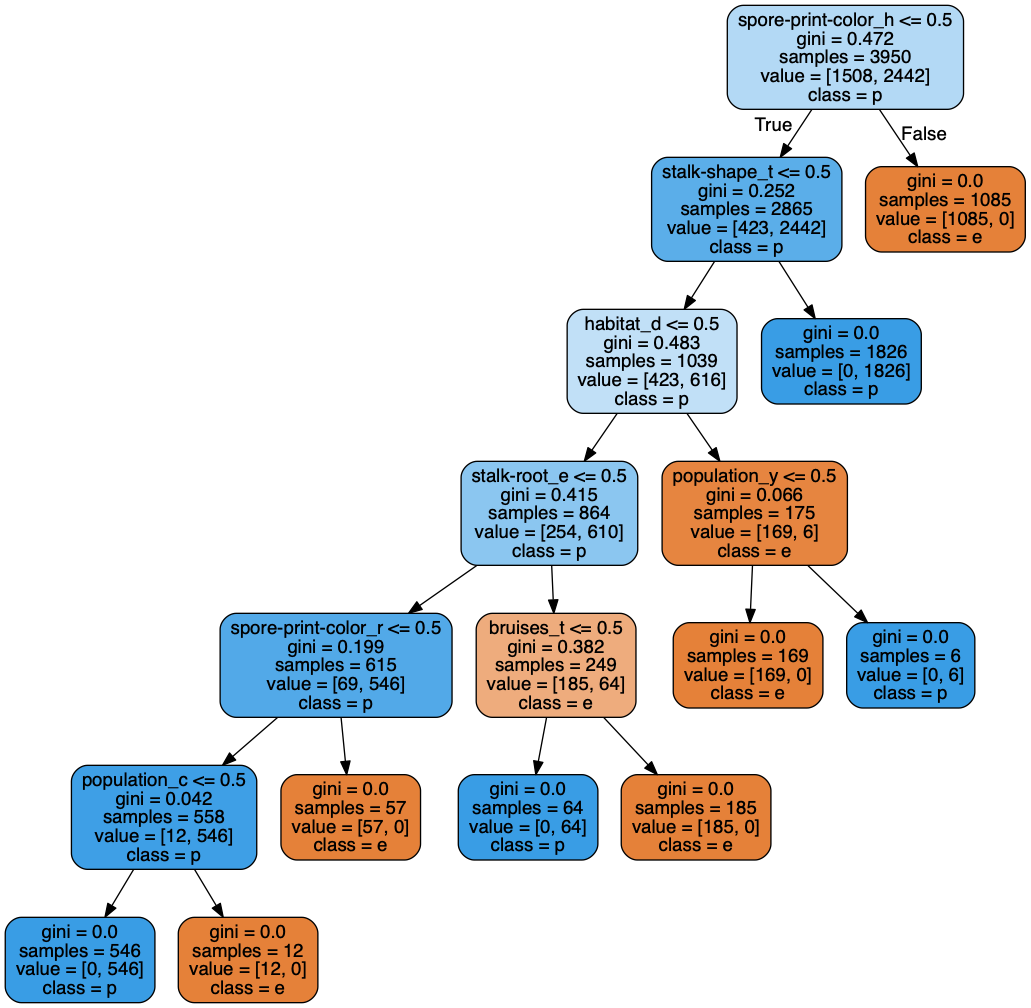

In [201]:
graph = tree_plot(tree, mushrooms_without_NaN) 
Image(graph.create_png())

In [202]:
tree.tree_.node_count

17

Thus, our feature importance is only useful to inform the mushroom hunters about them, but the actual simpler tree uses `spore-print-color`, `stalk-shape`, `habitat`, `stalk-root`, `population` and `bruises`, out of which 5 of them are on the top on Random Forest and they are also ranked high on Logistic Regression, but it does seems that Random Forest works better.

In [203]:
# Prints the features ranked by importance by Logistic Regression
features_ranked

['stalk-shape',
 'stalk-root',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'bruises',
 'stalk-color-below-ring',
 'habitat',
 'cap-color',
 'population',
 'ring-number',
 'stalk-color-above-ring',
 'cap-shape',
 'gill-color']

In [204]:
# Prints the features ranked by importance by Random Forest
feat_importances

stalk-shape               0.222607
stalk-root                0.141749
spore-print-color         0.141567
bruises                   0.116209
ring-type                 0.095569
habitat                   0.080052
stalk-color-above-ring    0.072190
population                0.037214
cap-color                 0.030511
gill-color                0.027106
stalk-color-below-ring    0.021069
cap-shape                 0.010066
ring-number               0.003775
veil-color                0.000317
dtype: float64

# 5. Support Vector Machine <a name="svm1"></a>

In [205]:
from sklearn.svm import SVC

In [206]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN) 
svm = train_and_test(SVC(random_state = 0), [X_train, y_train], [X_test, y_test])

0.9929119905493208


Once again, we don't get a perfect score right away. Let's tune the hyperparameters.

In [207]:
pipe = Pipeline([('clf', SVC(random_state = 0))])

In [208]:
param_grid = [{'clf__C': [0.01, 0.1, 1, 10, 100],
               'clf__gamma': [0.01, 0.1, 1, 10, 100],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]

The reason support vector machines are so slow is because when using non-linear kernels, the complexity is approximately $\alpha$ `(n_samples^2 * n_features)`. [Source](https://stackoverflow.com/questions/40077432/scikit-learn-svm-svc-is-extremely-slow).

In [209]:
#import time
#start = time.time()
#gs = GridSearchCV(estimator=pipe,
#                      param_grid=param_grid,
#                      scoring='accuracy',
#                      cv=StratifiedKFold(n_splits=10,
#                                         shuffle=True,
#                                         random_state=0)) 
# Fit the pipeline
#gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
#print(gs.best_score_, gs.best_params_, gs.best_estimator_)
#print(time.time() - start) 

# Output:

#1.0 {'clf__C': 0.01, 'clf__gamma': 1, 'clf__kernel': 'poly'} Pipeline(memory=None,
#     steps=[('clf', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
#  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
#  max_iter=-1, probability=False, random_state=0, shrinking=True,
#  tol=0.001, verbose=False))])
#979.3182301521301

Indeed, the time it took now was 979.3182301521301 seconds, while when using all the features was 3607.864349126816 seconds.

In [210]:
svm = train_and_test(SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
                     [X_train, y_train], [X_test, y_test])

1.0


# 6. K-Nearest Neighbors <a name="knn1"></a>

In [211]:
from sklearn.neighbors import KNeighborsClassifier

In [212]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_without_NaN)
knn = train_and_test(KNeighborsClassifier(), [X_train, y_train], [X_test, y_test])

1.0


# 7. Naive Bayes <a name="NB1"></a>

In [213]:
from sklearn.naive_bayes import GaussianNB

In [214]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_without_NaN)
svm = train_and_test(GaussianNB(), [X_train, y_train], [X_test, y_test])

0.9320732427643237


In [215]:
pipe = Pipeline([('clf', GaussianNB())])

param_grid = {'clf__priors': [None],
               'clf__var_smoothing': [1e-9]}

gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0)) 
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
print(gs.best_score_, gs.best_params_, gs.best_estimator_)

gs.best_estimator_.score(X_test, y_test)

0.9260759493670886 {'clf__priors': None, 'clf__var_smoothing': 1e-09} Pipeline(memory=None,
     steps=[('clf', GaussianNB(priors=None, var_smoothing=1e-09))])


0.9320732427643237

In [216]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_without_NaN)
logreg = train_and_test(GaussianNB(priors=None, var_smoothing=1e-09), [X_train, y_train], [X_test, y_test])

0.9320732427643237


In [217]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[ 540,  107],
       [   8, 1038]])

In [218]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True) 

Predicted    0     1   All
True                      
0          540   107   647
1            8  1038  1046
All        548  1145  1693

Naive Bayes performs horribly in this case. We have 107 false positives (poisonous mushrooms classified as edible) out of 647 poisonous mushrooms.  

# 8. Clustering <a name="cluster1"></a>

In [219]:
from sklearn.cluster import KMeans

In [220]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN) 
# Gets the indexes of the unique class labels
classes, indices = np.unique(y_train, return_index=True)
# Removes lables from y_train minus two unique ones
y_train = np.array([y_train[i] if i in indices else -1 for i in range(y_train.shape[0])])

In [221]:
km = KMeans(n_clusters=2, random_state=0)   
# Computes the clusters for the training data
y_train_pred = km.fit_predict(X_train)
# Gets the map of the clusters indexes to the original labels
dict_ = {}
dict_[0] = 0
dict_[1] = 1
# Uses the clustering on the testing data
y_test_pred = km.predict(X_test)
# And the map to get back the original labels
y_test_pred = np.array([dict_[key] for key in y_test_pred])
# Computes the accuracy comparing with the real labels
from sklearn.metrics import precision_recall_fscore_support
print('Accuracy:', end=' ')
print(precision_recall_fscore_support(y_test_pred, y_test, average='micro')[0])

Accuracy: 0.854695806261075


# Analyzing Top Features: <a name="last"></a>

In this last section we are going to analyze the top features to give the mushroom hunters some indications as to when a mushroom is very likely to be poisonous.

In [222]:
# Prints the features ranked by importance by Logistic Regression
features_ranked

['stalk-shape',
 'stalk-root',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'bruises',
 'stalk-color-below-ring',
 'habitat',
 'cap-color',
 'population',
 'ring-number',
 'stalk-color-above-ring',
 'cap-shape',
 'gill-color']

In [223]:
# Prints the features ranked by importance by Random Forest
feat_importances

stalk-shape               0.222607
stalk-root                0.141749
spore-print-color         0.141567
bruises                   0.116209
ring-type                 0.095569
habitat                   0.080052
stalk-color-above-ring    0.072190
population                0.037214
cap-color                 0.030511
gill-color                0.027106
stalk-color-below-ring    0.021069
cap-shape                 0.010066
ring-number               0.003775
veil-color                0.000317
dtype: float64

We will be using the top features obtained by the Random Forest.

In [224]:
# Gets the features until a significant decrease in importance (from 0.072 to 0.037)
top_features = list(feat_importances[:list(feat_importances.index).index("stalk-color-above-ring")+1].index)
# Subsets the dataframe using this features and class
top_features.append("class")
mushrooms_easy_important = mushrooms[top_features]
mushrooms_easy_important.head()

stalk-shape stalk-root spore-print-color bruises ring-type habitat  \
0           e          c                 n       t         p       g   
1           e          c                 n       t         p       m   
2           e          e                 k       t         p       u   
3           t          e                 n       f         e       g   
4           e          c                 k       t         p       g   

  stalk-color-above-ring class  
0                      w     e  
1                      w     e  
2                      w     p  
3                      w     e  
4                      w     e

In [225]:
# Computes a dictionary containing with keys each features and values a list of tuples 
# with each value of the feature and the corresponding percentage of poisonous samples out of all the samples
# ordered in ascending order
pois = {}
import operator
for i in top_features[:-1]:
    stalk_root_edibility_table = pd.crosstab(index=mushrooms_easy_important["class"],
                                             columns=mushrooms_easy_important[i])
    poison_percent = {}
    for j in stalk_root_edibility_table:
        poison_percent[j] = stalk_root_edibility_table[j][1]/(stalk_root_edibility_table[j][1] + stalk_root_edibility_table[j][0])
    pois[i] = sorted(poison_percent.items(), key=operator.itemgetter(1)) # https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

In [226]:
pois

{'stalk-shape': [('t', 0.4375), ('e', 0.5402560455192034)],
 'stalk-root': [('r', 0.0),
  ('c', 0.07913669064748201),
  ('e', 0.22788203753351208),
  ('b', 0.4915254237288136),
  ('?', 0.7096774193548387)],
 'spore-print-color': [('b', 0.0),
  ('o', 0.0),
  ('u', 0.0),
  ('y', 0.0),
  ('n', 0.11382113821138211),
  ('k', 0.11918760021378942),
  ('w', 0.7587939698492462),
  ('h', 0.9705882352941176),
  ('r', 1.0)],
 'bruises': [('t', 0.18459259259259259), ('f', 0.6933445661331087)],
 'ring-type': [('f', 0.0),
  ('p', 0.205444920594908),
  ('e', 0.6368876080691642),
  ('l', 1.0),
  ('n', 1.0)],
 'habitat': [('w', 0.0),
  ('m', 0.1232876712328767),
  ('g', 0.34450651769087526),
  ('d', 0.4027954256670902),
  ('l', 0.7115384615384616),
  ('u', 0.7384196185286104),
  ('p', 0.8811188811188811)],
 'stalk-color-above-ring': [('e', 0.0),
  ('g', 0.0),
  ('o', 0.0),
  ('w', 0.3833744118306072),
  ('p', 0.6923076923076923),
  ('n', 0.9642857142857143),
  ('b', 1.0),
  ('c', 1.0),
  ('y', 1.0)]}

Looking at this output, we can say things like `stalk-root = r` is most likely edible, but of course we advise against eating a mushroom just because of that reason. `spore-print-color = h, w, r` are most likely poisonous, so mushroom hunters can stop wasting their time if they see this type of mushroom and move onto the next one. `bruises = f` is also likely poisonous. Same goes for `ring_type = l, n`, `habitat = l, u, p` and `stalk-color-above-ring = n, b, c, y`. 

This can also be visualized on the plots below.

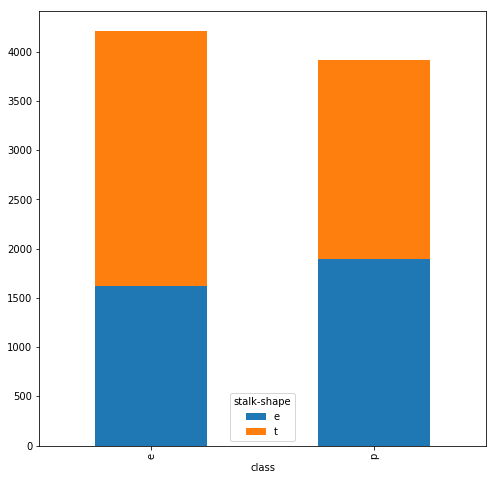

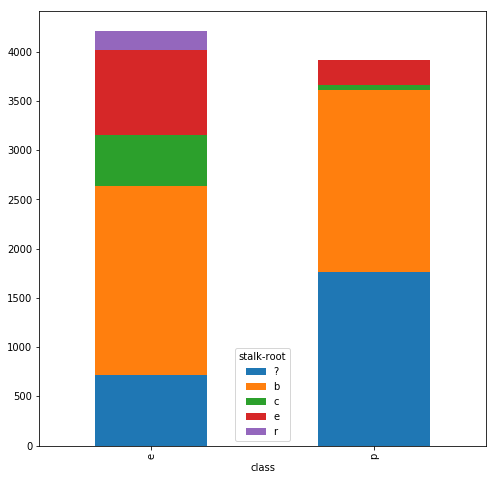

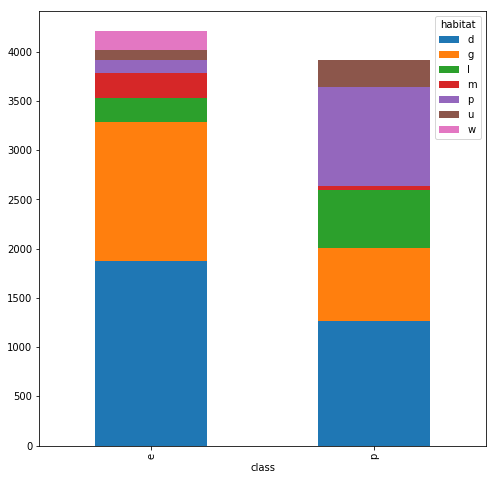

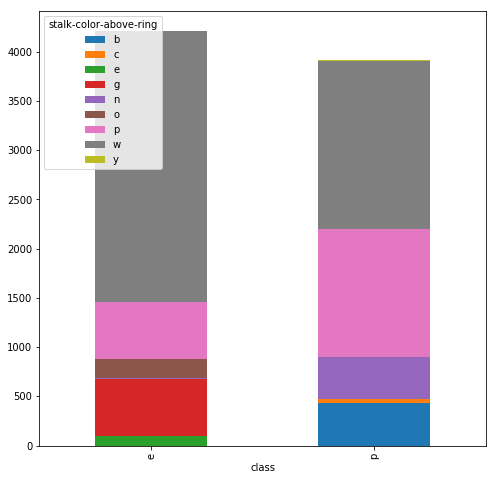

In [227]:
for i in top_features[:-1]:
    stalk_root_edibility_table = pd.crosstab(index=mushrooms_easy_important["class"],
                                             columns=mushrooms_easy_important[i]) 
    stalk_root_edibility_table.plot(kind="bar", figsize=(8,8),stacked=True) 
plt.show()

# Conclusions <a name="conclusions"></a>

Throughout this project, we implemented different machine learning algorithms to classify mushrooms as edible or poisonous. As we had a lot of features and some of them were hard to identify, we divided the project in two parts. In the first part, we performed our analysis and prediction using all the features, and on the second part, we did the same but only for the *easy-to-tell* features. 

First we did some EDA and realized that the `stalk-root` feature was missing on 30% of the samples.  Thus, we decided to try different approaches when implementing our models: 
1. Using the dataset without column stalk-root
2. Using the raw dataset with ? as np.NaN
3. Using the raw dataset (treating ? as possible value of stalk-root)
4. Using the dataset without rows with missing values (losing 30% of our data)
5. Using mode imputation

On the first part, we got perfect scores for Logistic Regression, Decision Tree and Random Forest for every treatment of the missing values. For the rest of the classifiers, we only used the dataset without the stalk-root feature, as we saw that it was not needed. Support Vector Machines and K-Nearest Neighbors also gave perfect accuracies, while Naive Bayes almost (0.9988186650915535). Clustering also performed decently, giving back an accuracy of 0.9043906442347148. 

We also used Logistic Regression and Random Forest to get the feature importances (only the ranking in the Logistic Regression case). For Logistic Regression, only one feature (`odor`) out of our *hard-to-tell* features had a very relevant role (ranked first). It was also ranked first by Random Forest, but in this case stalk surfaces (above and below) were also relevant.  

The Decision Tree was one of the most interesting models because it can give back rules to classify the mushrooms. That is, the mushroom hunters are not required to bring a phone with them and feed the features as input to a model running in their phone. Instead, a piece of paper with the decision tree printed on it should be enough (given that they can identify the mushroom as one from the Lepiota or Agaricus genera). We saw that using all features with no missing values (dropping 30% of the data) was the approach that gave the simplest tree (17 nodes). 

For the second part, things became a bit more interesting. In this case, without using `stalk-root` during Logistic Regression, we were able to drop the number of poisonous (negative) mushrooms identified as edible (positive) to only 1 out of 1175 poisonous mushrooms on the testing data. This is because `stalk-root` turned out to be one of the most important features (ranked second) when we eliminated the *hard-to-tell* features. For the rest of approaches, we were able to get a perfect score once again. We could also clearly see the features moving up in the importance ranking in a natural way, filling up the places left by the *hard-to-tell* features. The Decision Tree proved to be very complex without `stalk-root` (89 nodes), and also gave 8 false positives. The rest of the approaches gave perfect scores and once again, the simplest tree was computed by using all the features and no missing values, being composed of 17 nodes. 

For the rest of the classifiers we used the approach 4. Random Forest performed perfectly and gave similar feature importances results as Logistic Regression for most of the features, although some of them did change a lot (`veil-color` was ranked third by Logistic Regression and last by Random Forest). Given the ways we computed the importances, we believe Random Forest to be more reliable. Support Vector Machine gave a perfect score and we also witnessed how the time complexity dropped significantly, because we were using less features (the effect is even greater because they were all converted to dummy features, as they are all categorical). K-Nearest Neighbors also performed perfectly, while Naive Bayes gave a lot of trouble (107 false positives out of 647 poisonous (negative) mushrooms). The accuracy of clustering also decreased to 0.854695806261075. 

Finally, we computed the percentage of poisonous mushrooms for the top *easy-to-tell* features found by the Random Forest. We found that `spore-print-color = h, w, r` are most likely poisonous, so mushroom hunters can stop wasting their time if they see this type of mushroom and move onto the next one (actually, for this one this is not useful as to classify this feature the hunter needs to wait a whole night). If it does not bruise, the mushroom will also likely be poisonous. Same goes for large or no rings, for mushrooms living on leaves, cities and paths, and the stalk color above the ring being  brown, buff, cinnamon or yellow. This could be done for the rest of the features, but this ones seem to be the most interesting.

Along this notebook there are lots of trees, but if we would have to pick only one to bring with us while mushroom hunting, this one would be it:

In [228]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_without_NaN.drop("spore-print-color", axis = 1))
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


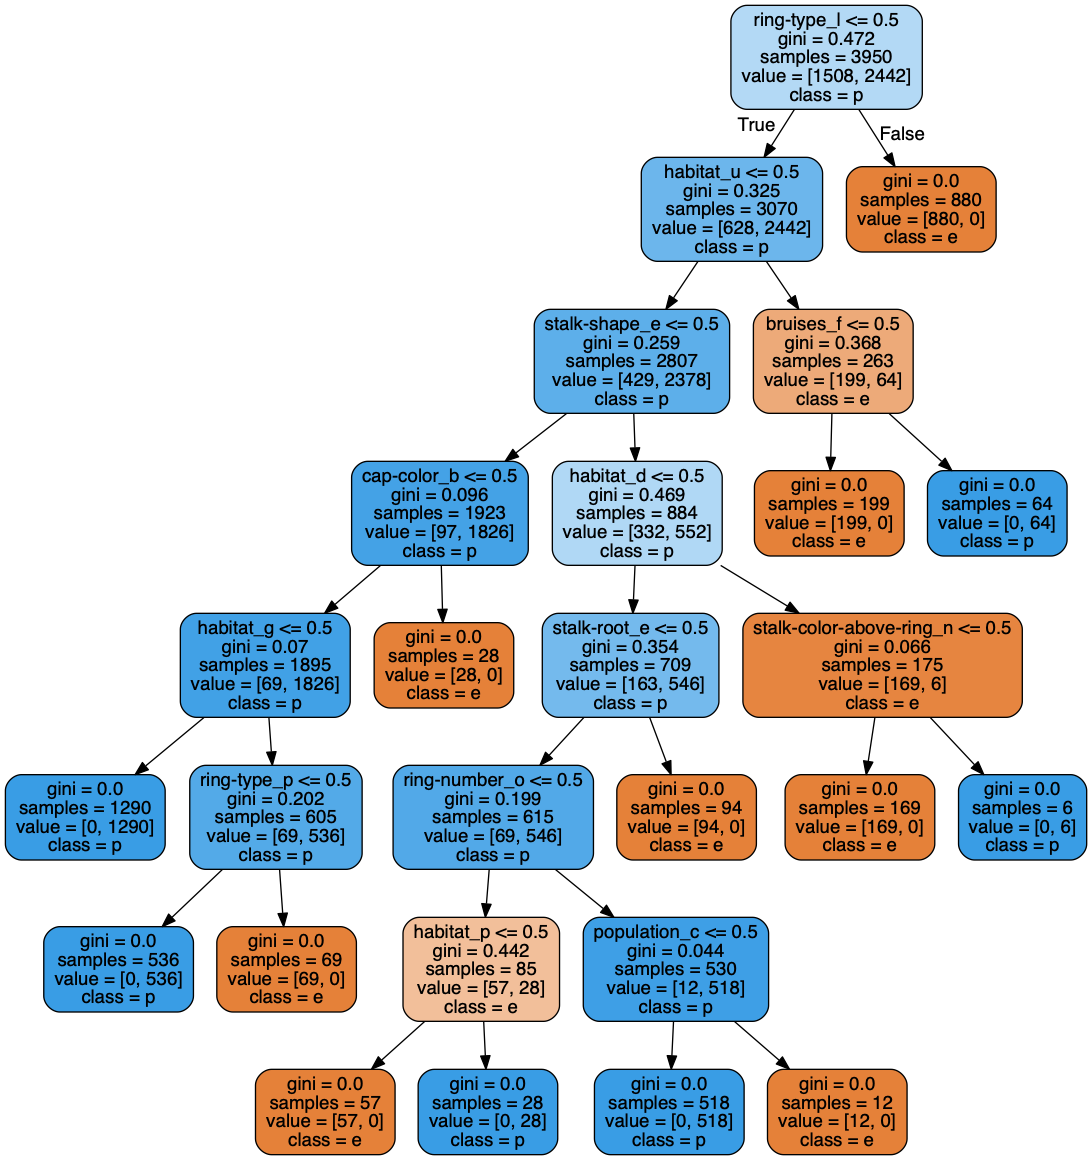

In [229]:
graph = tree_plot(tree, mushrooms_without_NaN.drop("spore-print-color", axis = 1)) 
Image(graph.create_png())

In [230]:
tree.tree_.node_count

27

We took `spore-print-color` out of the features as this is a very annoying feature, even if it is easy to identify, it cannot be done until the next day of collecting the mushroom.